In [1]:
import sys 
import matplotlib.pyplot as plt
import logic.pulsed.pulse_objects as po
import time
poi_m = poimanagerlogic
pml = pulsedmeasurementlogic
pmal = pulsedmasterlogic
odmr = odmrlogic
import os
sys.path.insert(0, 'C:/qudi/qudi/notebooks/AWG8190a')
import awg8190a_backend36
import waveforms133 as waveforms105
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

In [2]:
def optimize():
        confocal.refocus_clicked()
        time.sleep(1)
        while optimizerlogic.module_state()=='locked':
           time.sleep(1)
        return 

In [3]:
class auto_measurements:
    def __init__(self):
        
        self.current_poi = poi_m.active_poi
        
    def optimize(self, poi = None):
        if poi is None:
            poi_m.optimise_poi_position(name = self.current_poi)
        else:
            poi_m.optimise_poi_position(name = poi)
        time.sleep(1)
        while optimizerlogic.module_state()=='locked':
           time.sleep(1)
        return 

    def auto_run(self, start, stop, opt_time, save_time, end_time, tag, fit=None, alternating = True, sleep_aft_opt_time=5, raw_data_threshold=np.inf):
        self.set_poi(None)
        if start:
            pulsedmeasurementlogic.start_pulsed_measurement()
        else:
            pulsedmeasurementlogic.continue_pulsed_measurement()
        time_end = time.monotonic()
        while (time.monotonic() - time_end) < end_time:
            os.system('cmd /c "shutdown -a"')
            time60 = time.monotonic()
            while (time.monotonic() - time60) < save_time:
                time10 = time.monotonic()
                while (time.monotonic() - time10) < opt_time:
                    if pulsedmeasurementlogic.module_state() == 'idle':
                        break
                    if pml.raw_data[0,0] > raw_data_threshold:
                        break
                    pulsedmasterlogic.do_fit(fit, alternating)
                    time.sleep(2)
                if pulsedmeasurementlogic.module_state() == 'idle':
                    pulsedmasterlogic.do_fit(fit, alternating)
                    break
                if pml.raw_data[0,0] > raw_data_threshold:
                    break
                pulsedmeasurementlogic.pause_pulsed_measurement()
                time.sleep(sleep_aft_opt_time)
                self.optimize()
                time.sleep(5)
                pulsedmeasurementlogic.continue_pulsed_measurement()
            pml.save_measurement_data(tag=tag)
            if pulsedmeasurementlogic.module_state() == 'idle':
                break
            if pml.raw_data[0,0] > raw_data_threshold:
                break
        if stop:
            pulsedmeasurementlogic.stop_pulsed_measurement()
        else:
            pulsedmeasurementlogic.pause_pulsed_measurement()
    def ODMR_single(self, run_time, opt_time, fit=None):
    
        odmr.set_runtime(run_time)
        os.system('cmd /c "shutdown -a"')
        odmr.start_odmr_scan()
        while odmr.module_state()=='locked':
            time10 = time.monotonic()
            while (time.monotonic() - time10) < opt_time:
                odmr.do_fit(fit_function=fit)
                time.sleep(5)
                if odmr.module_state() == 'idle':
                    break
            odmr.stop_odmr_scan()
            if odmr.module_state() == 'idle':
                    break
            while odmr.module_state()=='locked':
                time.sleep(1)
            am.optimize()
            odmr.continue_odmr_scan()
        odmr.save_odmr_data(tag=f'{self.current_poi}')
            
    def set_poi(self, poi=None):
        if poi is None:
            self.current_poi = poi_m.active_poi
        else:
            poi_m.set_active_poi(name = poi)
            self.current_poi = poi_m.active_poi
        
    def rabi_tag(self, amp):
        tag = f'rabi_{self.current_poi}_{int(wav.awg_freq*1e-3)}KHz_{amp}amp'
        return tag
    
    def FID_tag(self, amp, pi_pulse):
        tag = f'ramsey_{self.current_poi}_{int(wav.awg_freq*1e-3)}KHz_{amp}amp_{pi_pulse}ns'
        return tag
    
    def PODMR_tag(self, amp, pi_pulse):
        tag = f'PODMR_{self.current_poi}_{amp}amp_{pi_pulse}ns'
        return tag
    
    def pi_pulse_test_tag(self, amp, pi_pulse, pulse_type = 'square', pi_square = None):        
        tag = f'pi_pulse_test_{pulse_type}_{self.current_poi}_{int(wav.awg_freq*1e-3)}KHz_{amp}amp_{pi_pulse}ns_{pulse_type}_{pi_square}sq'
        return tag
    
    def hahn_echo_tag(self, amp, pi_pulse):
        tag = f'hahn_echo_{self.current_poi}_{int(wav.awg_freq*1e-3)}KHz_{amp}amp_{pi_pulse}ns'
        return tag
    
    def coupling_tag(self, amp, pi_pulsea, pi_pulseb, freq2):
        tag = f'coupling_{self.current_poi}_{int(wav.awg_freq*1e-3)}KHz_a_{freq2}KHz_b_{pi_pulsea}ns_NVa_{pi_pulseb}ns_NVb_{amp}amp'
        return tag
    
    def xy8_tag(self, amp, pi_pulse, order, pulse_type='square'):
        tag = f'xy8{pulse_type}ord{i}_{self.current_poi}_{int(wav.awg_freq*1e-3)}KHz_{pi_pulse}ns_{amp}amp'
        return tag
    
    def T1_tag(self, amp, pi_pulse):
        tag = f'T1_{self.current_poi}_{int(wav.awg_freq*1e-3)}KHz_{pi_pulse}ns_{amp}amp'
        return amp
    
    def KDD_tag(self, amp, pi_pulse, order):
        tag = f'KDDord{i}_{self.current_poi}_{int(wav.awg_freq*1e-3)}KHz_{pi_pulse}ns_{amp}amp'
        return tag
    
    def xy4_tag(self, amp, pi_pulse, order):
        tag = f'xy4ord{i}_{self.current_poi}_{int(wav.awg_freq*1e-3)}KHz_{pi_pulse}ns_{amp}amp'
        return tag
    
    def KDD_rabi_tag(self, amp, pi_pulse , tau):
        tag = f'KDDrabi_{self.current_poi}_{int(wav.awg_freq*1e-3)}KHz_{tau}tau_{pi_pulse}pi_{amp}amp'
        return tag
    
    def xy4_rabi_tag(self, amp, pi_pulse , tau):
        tag = f'xy4rabi_{self.current_poi}_{int(wav.awg_freq*1e-3)}KHz_{tau}tau_{pi_pulse}pi_{amp}amp'
        return tag
    
    def KDD_correlation_tag(self, amp, pi_pulse, order, tau, shp1, shp2):
        tag = f'KDD_corr_ord{order}_{self.current_poi}_{int(wav.awg_freq*1e-3)}KHz_{pi_pulse}ns_{amp}amp_{tau}tau_{shp1}secondhalfphase1_{shp2}secondhalfphase2'
        return tag
    
    def xy4_correlation_tag(self, amp, pi_pulse, order, tau):
        tag = f'xy4_corr_ord{order}_{self.current_poi}_{int(wav.awg_freq*1e-3)}KHz_{pi_pulse}ns_{amp}amp_{tau}tau'
        return tag
    
    def ramsey_correlation_tag(self, amp, pi_half, tau):
        tag = f'ramsey_corr_{self.current_poi}_{int(wav.awg_freq*1e-3)}KHz_{pi_pulse}pi_half_ns_{amp}amp_{tau}tau'
        return tag

In [4]:
class qudi_pulsed_measurements:

    def __init__(self, awg_sync_pause = 4e-6, laser_on = 3e-6, counter_off = 50e-9, relaxation_pause = 10e-6):

        self.awg_sync_pause = awg_sync_pause
        self.laser_on = laser_on
        self.counter_off = counter_off
        self.relaxation_pause = relaxation_pause
        self.pause_total_ns = (self.awg_sync_pause + self.laser_on + self.counter_off + self.relaxation_pause)*1e9
        
        self.max_samples = 2e9
        
        self.trigger_block = self.make_trigger_pulse_block()
        
    def make_trigger_pulse_block(self):
        ele = [] 
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': True, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=10*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        pulse_block = po.PulseBlock(name='trigger_block', element_list=ele)
        
        return pulse_block
    
    def check_max_samples(self, pulse_ensemble):
        try:
            num_samples = pmal.get_ensemble_info(pulse_ensemble)[1]*awg.sampling_freq
            print(f'Total number of samples:{num_samples}/{int(self.max_samples)} ({num_samples/self.max_samples*100}%)')
            if num_samples > self.max_samples:
                raise ValueError(f'Too many samples. Max samples:{self.max_samples}')
        except:
            pass
    
    def make_rabi_pulse_block(self, tau_start, tau_step, step_number):
        ele = []            
    
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau_start, increment_s=tau_step, pulse_function=None, digital_high=d_ch, laser_on=False))
            
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        pulse_block = po.PulseBlock(name=f'rabi_qudi', element_list=ele)
        
        return pulse_block

    def upload_rabi_ensemble(self, tau_start, tau_step, step_number, pulse_fnt):
        pulse = pulse_fnt(tau_start, tau_step, step_number)
        sequencegeneratorlogic.save_block(pulse)

#         bl = [(pulse.name,step_number-1)]
        bl = [(self.trigger_block.name, 0), (pulse.name,step_number-1)]
        auto_pulse_CW = po.PulseBlockEnsemble(name=f'rabi_qudi', block_list=bl, rotating_frame=False)

        ensemble = auto_pulse_CW
        ensemblename = auto_pulse_CW.name
        sequencegeneratorlogic.save_ensemble(ensemble)
        ret,_,_ = sequencegeneratorlogic.sample_pulse_block_ensemble(ensemblename)
        sequencegeneratorlogic.load_ensemble(ensemblename)
        self.check_max_samples(auto_pulse_CW)
        
        return ret

    def rabi(self, tau_start, tau_step, step_number):
        pulsedmasterlogic.set_ext_microwave_settings(use_ext_microwave=False)

        err = self.upload_rabi_ensemble(tau_start, tau_step, step_number, self.make_rabi_pulse_block)

        tau_list = np.linspace(tau_start*1e9, tau_start*1e9 + (step_number-1)*tau_step*1e9, step_number)*1e-9
        pulsedmasterlogic.set_measurement_settings(invoke_settings=False, 
                                                controlled_variable=tau_list,
                                                number_of_lasers=step_number, 
                                                laser_ignore_list=[], 
                                                alternating=False, 
                                                units=('s', 'arb. u.'))
        pulsedmasterlogic.set_fast_counter_settings(record_length = self.laser_on + self.counter_off)
        time.sleep(0.5)
        pulsedmasterlogic.set_alternative_data_type('None')
        time.sleep(0.5)
        
    def make_pulsed_ODMR_pulse_block(self, pi_pulse):
        ele = []
    
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        pulse_block = po.PulseBlock(name=f'pulsed_ODMR_qudi', element_list=ele)
        
        return pulse_block
    
    def upload_pulsed_ODMR_ensemble(self, freq_list, pi_pulse, pulse_fnt):
        pulse = pulse_fnt(pi_pulse)
        sequencegeneratorlogic.save_block(pulse)

#         bl = [(pulse.name,len(freq_list)-1)]
        bl = [(self.trigger_block.name, 0), (pulse.name,len(freq_list)-1)]
        auto_pulse_CW = po.PulseBlockEnsemble(name=f'pulsed_ODMR_qudi', block_list=bl, rotating_frame=False)

        ensemble = auto_pulse_CW
        ensemblename = auto_pulse_CW.name
        sequencegeneratorlogic.save_ensemble(ensemble)
        ret,_,_ = sequencegeneratorlogic.sample_pulse_block_ensemble(ensemblename)
        sequencegeneratorlogic.load_ensemble(ensemblename)
        self.check_max_samples(auto_pulse_CW)
        return ret
    
    def pulsed_ODMR(self, freq_start, freq_stop, freq_step, pi_pulse):
        pulsedmasterlogic.set_ext_microwave_settings(use_ext_microwave=False)
        freq_list = np.arange(freq_start, freq_stop+freq_step, freq_step)
        if not ((freq_stop-freq_start)/freq_step)%1 ==0:
            freq_list = freq_list[:-1]
        err = self.upload_pulsed_ODMR_ensemble(freq_list, pi_pulse, self.make_pulsed_ODMR_pulse_block)
        pulsedmasterlogic.set_measurement_settings(invoke_settings=False, 
                                                controlled_variable=freq_list,
                                                number_of_lasers=len(freq_list), 
                                                laser_ignore_list=[], 
                                                alternating=False, 
                                                units=('Hz', 'arb. u.'))
        pulsedmasterlogic.set_fast_counter_settings(record_length = self.laser_on + self.counter_off)
        time.sleep(0.5)
        pulsedmasterlogic.set_alternative_data_type('None')
        time.sleep(0.5)
        
    def make_FID_pulse_block(self, tau_start, tau_step, step_number, pi_half_pulse, pi_three_half_pulse, alternating):
        ele = []
    
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau_start, increment_s=tau_step, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

        d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        if alternating:
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau_start, increment_s=tau_step, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_three_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        pulse_block = po.PulseBlock(name=f'FID_qudi', element_list=ele)
        
        return pulse_block

    def upload_FID_ensemble(self, tau_start, tau_step, step_number, pi_half_pulse, pi_three_half_pulse, alternating, pulse_fnt):
        pulse = pulse_fnt(tau_start, tau_step, step_number, pi_half_pulse, pi_three_half_pulse, alternating)
        sequencegeneratorlogic.save_block(pulse)

#         bl = [(pulse.name,step_number-1)]
        bl = [(self.trigger_block.name, 0), (pulse.name,step_number-1)]
        auto_pulse_CW = po.PulseBlockEnsemble(name=f'FID_qudi', block_list=bl, rotating_frame=False)

        ensemble = auto_pulse_CW
        ensemblename = auto_pulse_CW.name
        sequencegeneratorlogic.save_ensemble(ensemble)
        ret,_,_ = sequencegeneratorlogic.sample_pulse_block_ensemble(ensemblename)
        sequencegeneratorlogic.load_ensemble(ensemblename)
        self.check_max_samples(auto_pulse_CW)
        return ret

    def FID(self, tau_start, tau_step, step_number, pi_half_pulse, pi_three_half_pulse, alternating):
        pulsedmasterlogic.set_ext_microwave_settings(use_ext_microwave=False)

        err = self.upload_FID_ensemble(tau_start, tau_step, step_number, pi_half_pulse, pi_three_half_pulse, alternating, self.make_FID_pulse_block)
        
        tau_list = np.linspace(tau_start*1e9, tau_start*1e9 + (step_number-1)*tau_step*1e9, step_number)*1e-9
        if alternating:
            laser_number = 2*step_number
        else:
            laser_number = step_number
        pulsedmasterlogic.set_measurement_settings(invoke_settings=False, 
                                                controlled_variable=tau_list,
                                                number_of_lasers=laser_number, 
                                                laser_ignore_list=[], 
                                                alternating=alternating, 
                                                units=('s', 'arb. u.'))
        pulsedmasterlogic.set_fast_counter_settings(record_length = self.laser_on + self.counter_off)
        time.sleep(0.5)
        if alternating:
            pulsedmasterlogic.set_alternative_data_type('Delta')
        else:
            pulsedmasterlogic.set_alternative_data_type('None')
        time.sleep(0.5)
        
    def make_hahn_echo_pulse_block(self, tau_start, tau_step, pi_half_pulse,  pi_pulse, pi_three_half_pulse, alternating):
        ele = []
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau_start/2, increment_s=tau_step/2, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau_start/2, increment_s=tau_step/2, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

        d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        if alternating:
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau_start/2, increment_s=tau_step/2, pulse_function=None, digital_high=d_ch, laser_on=False))
            
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau_start/2, increment_s=tau_step/2, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_three_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
        pulse_block = po.PulseBlock(name=f'hahn_echo_qudi', element_list=ele)
        
        return pulse_block

    def upload_hahn_echo_ensemble(self, tau_start, tau_step, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse, alternating, pulse_fnt):
        pulse = pulse_fnt(tau_start, tau_step, pi_half_pulse, pi_pulse, pi_three_half_pulse, alternating)
        sequencegeneratorlogic.save_block(pulse)

#         bl = [(pulse.name,step_number-1)]
        bl = [(self.trigger_block.name, 0), (pulse.name,step_number-1)]
        auto_pulse_CW = po.PulseBlockEnsemble(name=f'hahn_echo_qudi', block_list=bl, rotating_frame=False)

        ensemble = auto_pulse_CW
        ensemblename = auto_pulse_CW.name
        sequencegeneratorlogic.save_ensemble(ensemble)
        ret,_,_ = sequencegeneratorlogic.sample_pulse_block_ensemble(ensemblename)
        sequencegeneratorlogic.load_ensemble(ensemblename)
        self.check_max_samples(auto_pulse_CW)
        return ret

    def hahn_echo(self, tau_start, tau_step, step_number, pi_half_pulse, pi_pulse,  pi_three_half_pulse, alternating):
        pulsedmasterlogic.set_ext_microwave_settings(use_ext_microwave=False)

        err = self.upload_hahn_echo_ensemble(tau_start, tau_step, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse, alternating, self.make_hahn_echo_pulse_block)
        
        tau_list = np.linspace(tau_start*1e9, tau_start*1e9 + (step_number-1)*tau_step*1e9, step_number)*1e-9
        if alternating:
            laser_number = 2*step_number
        else:
            laser_number = step_number
        
        pulsedmasterlogic.set_measurement_settings(invoke_settings=False, 
                                                controlled_variable=tau_list,
                                                number_of_lasers=laser_number, 
                                                laser_ignore_list=[], 
                                                alternating=alternating, 
                                                units=('s', 'arb. u.'))
        pulsedmasterlogic.set_fast_counter_settings(record_length = self.laser_on + self.counter_off)
        time.sleep(0.5)
        pulsedmasterlogic.set_alternative_data_type('Delta')
        time.sleep(0.5)
        
    def make_pi_pulse_test_pulse_block(self, pi_pulse, num_pulses):
        ele = []         
        
        for i in range(num_pulses):
            for _ in range(i+1):
                d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

                d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                ele.append(po.PulseBlockElement(init_length_s=20e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        pulse_block = po.PulseBlock(name=f'pi_pulse_test_qudi', element_list=ele)
        
        return pulse_block

    def upload_pi_pulse_test_ensemble(self, pi_pulse, num_pulses, pulse_fnt):
        pulse = pulse_fnt(pi_pulse, num_pulses)
        sequencegeneratorlogic.save_block(pulse)

#         bl = [(pulse.name,0)]
        bl = [(self.trigger_block.name, 0), (pulse.name,0)]
        auto_pulse_CW = po.PulseBlockEnsemble(name=f'pi_pulse_test_qudi', block_list=bl, rotating_frame=False)

        ensemble = auto_pulse_CW
        ensemblename = auto_pulse_CW.name
        sequencegeneratorlogic.save_ensemble(ensemble)
        ret,_,_ = sequencegeneratorlogic.sample_pulse_block_ensemble(ensemblename)
        sequencegeneratorlogic.load_ensemble(ensemblename)
        self.check_max_samples(auto_pulse_CW)
        return ret

    def pi_pulse_test(self, pi_pulse, num_pulses):
        pulsedmasterlogic.set_ext_microwave_settings(use_ext_microwave=False)

        err = self.upload_pi_pulse_test_ensemble(pi_pulse, num_pulses, self.make_pi_pulse_test_pulse_block)

        pulsedmasterlogic.set_measurement_settings(invoke_settings=False, 
                                                controlled_variable=np.arange(1,num_pulses+1),
                                                number_of_lasers=num_pulses, 
                                                laser_ignore_list=[], 
                                                alternating=False, 
                                                units=('N', 'arb. u.'))
        pulsedmasterlogic.set_fast_counter_settings(record_length = self.laser_on + self.counter_off)
        time.sleep(0.5)
        pulsedmasterlogic.set_alternative_data_type('None')
        time.sleep(0.5)
        
    def make_xy8_pulse_block(self, tau_start, tau_step, step_number, order, pi_half_pulse, pi_three_half_pulse, pi_pulse, alternating):
        ele = []

        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau_start/2, increment_s=tau_step/2, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        for j in range(order):
            for i in range(8):
                d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                if i == 7 and j == order-1:
                    break
                    
                else:
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=tau_start, increment_s=tau_step, pulse_function=None, digital_high=d_ch, laser_on=False))
                    
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau_start/2, increment_s=tau_step/2, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

        d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        if alternating:
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau_start/2, increment_s=tau_step/2, pulse_function=None, digital_high=d_ch, laser_on=False))

            for j in range(order):
                for i in range(8):
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                    if i == 7 and j == order-1:
                        break
                    else:
                        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                        ele.append(po.PulseBlockElement(init_length_s=tau_start, increment_s=tau_step, pulse_function=None, digital_high=d_ch, laser_on=False))
                        
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau_start/2, increment_s=tau_step/2, pulse_function=None, digital_high=d_ch, laser_on=False))
            
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_three_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

            d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
            
        pulse_block = po.PulseBlock(name=f'xy8_qudi', element_list=ele)
        
        return pulse_block

    def upload_xy8_ensemble(self, tau_start, tau_step, step_number, order, pi_half_pulse, pi_three_half_pulse, pi_pulse, alternating, pulse_fnt):
        pulse = pulse_fnt( tau_start, tau_step, step_number, order, pi_half_pulse, pi_three_half_pulse, pi_pulse, alternating)
        sequencegeneratorlogic.save_block(pulse)

        bl = [(pulse.name,step_number-1)]
        bl = [(self.trigger_block.name, 0), (pulse.name,step_number-1)]
        auto_pulse_CW = po.PulseBlockEnsemble(name=f'xy8_qudi', block_list=bl, rotating_frame=False)

        ensemble = auto_pulse_CW
        ensemblename = auto_pulse_CW.name
        sequencegeneratorlogic.save_ensemble(ensemble)
        ret,_,_ = sequencegeneratorlogic.sample_pulse_block_ensemble(ensemblename)
        sequencegeneratorlogic.load_ensemble(ensemblename)
        self.check_max_samples(auto_pulse_CW)
        return ret

    def xy8(self, tau_start, tau_step, step_number, order, pi_half_pulse, pi_three_half_pulse, pi_pulse, alternating):
        pulsedmasterlogic.set_ext_microwave_settings(use_ext_microwave=False)

        err = self.upload_xy8_ensemble(tau_start, tau_step, step_number, order, pi_half_pulse, pi_three_half_pulse, pi_pulse, alternating, self.make_xy8_pulse_block)
        
        tau_list = np.linspace(tau_start*1e9*8*order, tau_start*1e9*8*order+tau_step*1e9*8*(step_number-1)*order, step_number)*1e-9
        
        if alternating:
            laser_number = 2*step_number
        else:
            laser_number = step_number
        
        pulsedmasterlogic.set_measurement_settings(invoke_settings=False, 
                                                controlled_variable=tau_list,
                                                number_of_lasers=laser_number, 
                                                laser_ignore_list=[], 
                                                alternating=alternating, 
                                                units=('s', 'arb. u.'))
        pulsedmasterlogic.set_fast_counter_settings(record_length = self.laser_on + self.counter_off)
        time.sleep(0.5)
        pulsedmasterlogic.set_alternative_data_type('Delta')
        time.sleep(0.5)
        
    def make_coupling_pulse_block(self, tau0, step_number, freq2, pi_half_a, pi_a, pi_three_half_a, pi_b, alternating):
        ele = []
        tau_step = (tau0-pi_b*10e-9-20e-9)/(step_number-1)
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_a*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau0, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_a*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=10e-9, increment_s=tau_step, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_b*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau0-10e-9, increment_s=-tau_step, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_a*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

        d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        if alternating:
            
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': True, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=10*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))    

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_a*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau0, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_a*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=10e-9, increment_s=tau_step, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_b*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau0-10e-9, increment_s=-tau_step, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_three_half_a*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

            d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
        pulse_block = po.PulseBlock(name=f'coupling_qudi', element_list=ele)
        
        return pulse_block

    def upload_coupling_ensemble(self, tau0, step_number, freq2, pi_half_a, pi_a, pi_three_half_a, pi_b, alternating, pulse_fnt):
        pulse = pulse_fnt(tau0, step_number, freq2, pi_half_a, pi_a, pi_three_half_a, pi_b, alternating)
        sequencegeneratorlogic.save_block(pulse)

        bl = [(pulse.name,step_number-1)]
        bl = [(self.trigger_block.name, 0), (pulse.name,step_number-1)]
        auto_pulse_CW = po.PulseBlockEnsemble(name=f'coupling_qudi', block_list=bl, rotating_frame=False)

        ensemble = auto_pulse_CW
        ensemblename = auto_pulse_CW.name
        sequencegeneratorlogic.save_ensemble(ensemble)
        ret,_,_ = sequencegeneratorlogic.sample_pulse_block_ensemble(ensemblename)
        sequencegeneratorlogic.load_ensemble(ensemblename)
        self.check_max_samples(auto_pulse_CW)
        return ret

    def coupling(self, tau0, step_number, freq2, pi_half_a, pi_a, pi_three_half_a, pi_b, alternating):
        pulsedmasterlogic.set_ext_microwave_settings(use_ext_microwave=False)

        err = self.upload_coupling_ensemble(tau0, step_number, freq2, pi_half_a, pi_a, pi_three_half_a, pi_b, alternating, self.make_coupling_pulse_block)

        
        tau_list = np.linspace(10, tau0*1e9-20-pi_b, step_number)*1e-9
        
        if alternating:
            laser_number = 2*step_number
        else:
            laser_number = step_number
        
        pulsedmasterlogic.set_measurement_settings(invoke_settings=False, 
                                                controlled_variable=tau_list,
                                                number_of_lasers=laser_number, 
                                                laser_ignore_list=[], 
                                                alternating=alternating, 
                                                units=('s', 'arb. u.'))
        pulsedmasterlogic.set_fast_counter_settings(record_length = self.laser_on + self.counter_off)
        time.sleep(0.5)
        pulsedmasterlogic.set_alternative_data_type('Delta')
        time.sleep(0.5)
        
    def make_T1_pulse_block(self, tau_start, tau_step, step_number, pi_pulse, alternating):
        ele = []
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau_start, increment_s=tau_step, pulse_function=None, digital_high=d_ch, laser_on=False))
            
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        if alternating:
            
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau_start, increment_s=tau_step, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        pulse_block = po.PulseBlock(name=f'T1_qudi', element_list=ele)
        
        return pulse_block

    def upload_T1_ensemble(self, tau_start, tau_step, step_number, pi_pulse, alternating, pulse_fnt):
        pulse = pulse_fnt(tau_start, tau_step, step_number, pi_pulse, alternating)
        sequencegeneratorlogic.save_block(pulse)

        bl = [(pulse.name,step_number-1)]
        bl = [(self.trigger_block.name, 0), (pulse.name,step_number-1)]
        auto_pulse_CW = po.PulseBlockEnsemble(name=f'T1_qudi', block_list=bl, rotating_frame=False)

        ensemble = auto_pulse_CW
        ensemblename = auto_pulse_CW.name
        sequencegeneratorlogic.save_ensemble(ensemble)
        ret,_,_ = sequencegeneratorlogic.sample_pulse_block_ensemble(ensemblename)
        sequencegeneratorlogic.load_ensemble(ensemblename)
        self.check_max_samples(auto_pulse_CW)
        return ret

    def T1(self, tau_start, tau_step, step_number, pi_pulse, alternating):
        pulsedmasterlogic.set_ext_microwave_settings(use_ext_microwave=False)

        err = self.upload_T1_ensemble(tau_start, tau_step, step_number, pi_pulse, alternating, self.make_T1_pulse_block)
        tau_list = np.linspace(tau_start*1e9, tau_start*1e9 + (step_number-1)*tau_step*1e9, step_number)*1e-9
        if alternating:
            laser_number = 2*step_number
        else:
            laser_number = step_number
        
        pulsedmasterlogic.set_measurement_settings(invoke_settings=False, 
                                                controlled_variable=tau_list,
                                                number_of_lasers=laser_number, 
                                                laser_ignore_list=[], 
                                                alternating=alternating, 
                                                units=('s', 'arb. u.'))
        pulsedmasterlogic.set_fast_counter_settings(record_length = self.laser_on + self.counter_off)
        time.sleep(0.5)
        pulsedmasterlogic.set_alternative_data_type('Delta')
        time.sleep(0.5)
        
    def make_KDD_pulse_block(self, tau_start, tau_step, step_number, order, pi_half_pulse, pi_pulse, pi_three_half_pulse, alternating):
        ele = []
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau_start/2, increment_s=tau_step/2, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        for j in range(order):
            for i in range(20):
                d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                if i == 19 and j == order-1:
                    break
                    
                else:
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=tau_start, increment_s=tau_step, pulse_function=None, digital_high=d_ch, laser_on=False))
                    
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau_start/2, increment_s=tau_step/2, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

#         d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
#         ele.append(po.PulseBlockElement(init_length_s=pi_three_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))  
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

        d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        if alternating:
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau_start/2, increment_s=tau_step/2, pulse_function=None, digital_high=d_ch, laser_on=False))

            for j in range(order):
                for i in range(20):
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                    if i == 19 and j == order-1:
                        break
                    else:
                        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                        ele.append(po.PulseBlockElement(init_length_s=tau_start, increment_s=tau_step, pulse_function=None, digital_high=d_ch, laser_on=False))
                        
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau_start/2, increment_s=tau_step/2, pulse_function=None, digital_high=d_ch, laser_on=False))
            
#             d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
#             ele.append(po.PulseBlockElement(init_length_s=pi_three_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

            d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
            
        pulse_block = po.PulseBlock(name=f'KDD_qudi', element_list=ele)
        
        return pulse_block

    def upload_KDD_ensemble(self, tau_start, tau_step, step_number, order, pi_half_pulse,pi_pulse, pi_three_half_pulse,  alternating, pulse_fnt):
        pulse = pulse_fnt( tau_start, tau_step, step_number, order, pi_half_pulse,pi_pulse, pi_three_half_pulse,  alternating)
        sequencegeneratorlogic.save_block(pulse)

#         bl = [(pulse.name,step_number-1)]
        bl = [(self.trigger_block.name, 0), (pulse.name,step_number-1)]
        auto_pulse_CW = po.PulseBlockEnsemble(name=f'KDD_qudi', block_list=bl, rotating_frame=False)

        ensemble = auto_pulse_CW
        ensemblename = auto_pulse_CW.name
        sequencegeneratorlogic.save_ensemble(ensemble)
        ret,_,_ = sequencegeneratorlogic.sample_pulse_block_ensemble(ensemblename)
        sequencegeneratorlogic.load_ensemble(ensemblename)
        self.check_max_samples(auto_pulse_CW)
        return ret

    def KDD(self, tau_start, tau_step, step_number, order, pi_half_pulse,pi_pulse, pi_three_half_pulse,  alternating):
        pulsedmasterlogic.set_ext_microwave_settings(use_ext_microwave=False)

        err = self.upload_KDD_ensemble(tau_start, tau_step, step_number, order, pi_half_pulse,pi_pulse, pi_three_half_pulse,  alternating, self.make_KDD_pulse_block)
        
        tau_list = np.linspace(tau_start*1e9*20*order, tau_start*1e9*20*order+tau_step*1e9*20*(step_number-1)*order, step_number)*1e-9
        
        if alternating:
            laser_number = 2*step_number
        else:
            laser_number = step_number
        
        pulsedmasterlogic.set_measurement_settings(invoke_settings=False, 
                                                controlled_variable=tau_list,
                                                number_of_lasers=laser_number, 
                                                laser_ignore_list=[], 
                                                alternating=alternating, 
                                                units=('s', 'arb. u.'))
        pulsedmasterlogic.set_fast_counter_settings(record_length = self.laser_on + self.counter_off)
        time.sleep(0.5)
        pulsedmasterlogic.set_alternative_data_type('Delta')
        time.sleep(0.5)
        
    def make_KDD_rabi_pulse_block(self,tau, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse):
        ele = []
    
        for k in range(step_number):
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            for j in range(k+1):
                for i in range(20):
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                    if i == 19 and j == k:
                        break

                    else:
                        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                        ele.append(po.PulseBlockElement(init_length_s=tau, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

            d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))


            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            for j in range(k+1):
                for i in range(20):
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                    if i == 19 and j == k:
                        break
                    else:
                        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                        ele.append(po.PulseBlockElement(init_length_s=tau, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_three_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

            d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            
        pulse_block = po.PulseBlock(name=f'KDD_rabi_qudi', element_list=ele)
        
        return pulse_block

    def upload_KDD_rabi_ensemble(self, tau, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse, pulse_fnt):
        pulse = pulse_fnt(tau, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse)
        sequencegeneratorlogic.save_block(pulse)

#         bl = [(pulse.name,0)]
        bl = [(self.trigger_block.name, 0), (pulse.name,0)]
        auto_pulse_CW = po.PulseBlockEnsemble(name=f'KDD_rabi_qudi', block_list=bl, rotating_frame=False)

        ensemble = auto_pulse_CW
        ensemblename = auto_pulse_CW.name
        sequencegeneratorlogic.save_ensemble(ensemble)
        ret,_,_ = sequencegeneratorlogic.sample_pulse_block_ensemble(ensemblename)
        sequencegeneratorlogic.load_ensemble(ensemblename)
        self.check_max_samples(auto_pulse_CW)
        return ret
        
    def KDD_rabi(self, tau, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse):
        pulsedmasterlogic.set_ext_microwave_settings(use_ext_microwave=False)

        err = self.upload_KDD_rabi_ensemble(tau, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse, self.make_KDD_rabi_pulse_block)
        
        tau_list = np.linspace(1, step_number, step_number)
        
        laser_number = 2*step_number
        
        pulsedmasterlogic.set_measurement_settings(invoke_settings=False, 
                                                controlled_variable=tau_list,
                                                number_of_lasers=laser_number, 
                                                laser_ignore_list=[], 
                                                alternating=True, 
                                                units=('order', 'arb. u.'))
        pulsedmasterlogic.set_fast_counter_settings(record_length = self.laser_on + self.counter_off)
        time.sleep(0.5)
        pulsedmasterlogic.set_alternative_data_type('Delta')
        time.sleep(0.5)

    def make_xy4_rabi_pulse_block(self,tau, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse):
        ele = []
    
        for k in range(step_number):
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            for j in range(k+1):
                for i in range(4):
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                    if i == 3 and j == k:
                        break

                    else:
                        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                        ele.append(po.PulseBlockElement(init_length_s=tau, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

            d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))


            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            for j in range(k+1):
                for i in range(4):
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                    if i == 3 and j == k:
                        break
                    else:
                        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                        ele.append(po.PulseBlockElement(init_length_s=tau, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_three_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

            d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            
        pulse_block = po.PulseBlock(name=f'xy8_rabi_qudi', element_list=ele)
        
        return pulse_block

    def upload_xy4_rabi_ensemble(self, tau, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse, pulse_fnt):
        pulse = pulse_fnt(tau, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse)
        sequencegeneratorlogic.save_block(pulse)

        bl = [(pulse.name,0)]
        bl = [(self.trigger_block.name, 0), (pulse.name,0)]
        auto_pulse_CW = po.PulseBlockEnsemble(name=f'xy4_rabi_qudi', block_list=bl, rotating_frame=False)

        ensemble = auto_pulse_CW
        ensemblename = auto_pulse_CW.name
        sequencegeneratorlogic.save_ensemble(ensemble)
        ret,_,_ = sequencegeneratorlogic.sample_pulse_block_ensemble(ensemblename)
        sequencegeneratorlogic.load_ensemble(ensemblename)
        self.check_max_samples(auto_pulse_CW)
        return ret
        
    def xy4_rabi(self, tau, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse):
        pulsedmasterlogic.set_ext_microwave_settings(use_ext_microwave=False)

        err = self.upload_xy4_rabi_ensemble(tau, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse, self.make_xy4_rabi_pulse_block)
        
        tau_list = np.linspace(1, step_number, step_number)
        
        laser_number = 2*step_number
        
        pulsedmasterlogic.set_measurement_settings(invoke_settings=False, 
                                                controlled_variable=tau_list,
                                                number_of_lasers=laser_number, 
                                                laser_ignore_list=[], 
                                                alternating=True, 
                                                units=('order', 'arb. u.'))
        pulsedmasterlogic.set_fast_counter_settings(record_length = self.laser_on + self.counter_off)
        time.sleep(0.5)
        pulsedmasterlogic.set_alternative_data_type('Delta')
        time.sleep(0.5)
        
    def make_xy4_pulse_block(self, tau_start, tau_step, step_number, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  alternating):
        ele = []
    
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau_start/2, increment_s=tau_step/2, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        for j in range(order):
            for i in range(4):
                d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                if i == 3 and j == order-1:
                    break
                    
                else:
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=tau_start, increment_s=tau_step, pulse_function=None, digital_high=d_ch, laser_on=False))
                    
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau_start/2, increment_s=tau_step/2, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

        d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        if alternating:
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau_start/2, increment_s=tau_step/2, pulse_function=None, digital_high=d_ch, laser_on=False))

            for j in range(order):
                for i in range(4):
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                    if i == 3 and j == order-1:
                        break
                    else:
                        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                        ele.append(po.PulseBlockElement(init_length_s=tau_start, increment_s=tau_step, pulse_function=None, digital_high=d_ch, laser_on=False))
                        
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau_start/2, increment_s=tau_step/2, pulse_function=None, digital_high=d_ch, laser_on=False))
            
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

            d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
            
        pulse_block = po.PulseBlock(name=f'xy4_qudi', element_list=ele)
        
        return pulse_block

    def upload_xy4_ensemble(self, tau_start, tau_step, step_number, order, pi_half_pulse, pi_pulse, pi_three_half_pulse, alternating, pulse_fnt):
        pulse = pulse_fnt( tau_start, tau_step, step_number, order, pi_half_pulse, pi_pulse, pi_three_half_pulse, alternating)
        sequencegeneratorlogic.save_block(pulse)

        bl = [(pulse.name,step_number-1)]
        bl = [(self.trigger_block.name, 0), (pulse.name,step_number-1)]
        auto_pulse_CW = po.PulseBlockEnsemble(name=f'xy4_qudi', block_list=bl, rotating_frame=False)

        ensemble = auto_pulse_CW
        ensemblename = auto_pulse_CW.name
        sequencegeneratorlogic.save_ensemble(ensemble)
        ret,_,_ = sequencegeneratorlogic.sample_pulse_block_ensemble(ensemblename)
        sequencegeneratorlogic.load_ensemble(ensemblename)
        self.check_max_samples(auto_pulse_CW)
        return ret

    def xy4(self, tau_start, tau_step, step_number, order, pi_half_pulse, pi_pulse, pi_three_half_pulse, alternating):
        pulsedmasterlogic.set_ext_microwave_settings(use_ext_microwave=False)

        err = self.upload_xy4_ensemble(tau_start, tau_step, step_number, order, pi_half_pulse,pi_pulse, pi_three_half_pulse,alternating, self.make_xy4_pulse_block)
        
        tau_list = np.linspace(tau_start*1e9*4*order, tau_start*1e9*4*order+tau_step*1e9*4*(step_number-1)*order, step_number)*1e-9
        
        if alternating:
            laser_number = 2*step_number
        else:
            laser_number = step_number
        
        pulsedmasterlogic.set_measurement_settings(invoke_settings=False, 
                                                controlled_variable=tau_list,
                                                number_of_lasers=laser_number, 
                                                laser_ignore_list=[], 
                                                alternating=alternating, 
                                                units=('s', 'arb. u.'))
        pulsedmasterlogic.set_fast_counter_settings(record_length = self.laser_on + self.counter_off)
        time.sleep(0.5)
        pulsedmasterlogic.set_alternative_data_type('Delta')
        
    def make_KDD_correlation_pulse_block(self, tau, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, alternating):
        ele = []
    
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        for j in range(order):
            for i in range(20):
                d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                if i == 19 and j == order-1:
                    break
                    
                else:
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=tau, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                    
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))        
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau_corr_start, increment_s=tau_corr_step, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        for j in range(order):
            for i in range(20):
                d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                if i == 19 and j == order-1:
                    break
                    
                else:
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=tau, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                    
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))        
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
        d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

        d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
        if alternating:
            
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            for j in range(order):
                for i in range(20):
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                    if i == 19 and j == order-1:
                        break

                    else:
                        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                        ele.append(po.PulseBlockElement(init_length_s=tau, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))        

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau_corr_start, increment_s=tau_corr_step, pulse_function=None, digital_high=d_ch, laser_on=False))
        
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            for j in range(order):
                for i in range(20):
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                    if i == 19 and j == order-1:
                        break

                    else:
                        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                        ele.append(po.PulseBlockElement(init_length_s=tau, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))        

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

            d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                        
        pulse_block = po.PulseBlock(name=f'KDD_correlation_qudi', element_list=ele)
        
        return pulse_block

    def upload_KDD_correlation_ensemble(self, tau, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating, pulse_fnt):
        pulse = pulse_fnt( tau, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, alternating)
        sequencegeneratorlogic.save_block(pulse)

#         bl = [(pulse.name,corr_step_number-1)]
        bl = [(self.trigger_block.name, 0), (pulse.name,corr_step_number-1)]
        auto_pulse_CW = po.PulseBlockEnsemble(name=f'KDD_correlation_qudi', block_list=bl, rotating_frame=False)

        ensemble = auto_pulse_CW
        ensemblename = auto_pulse_CW.name
        sequencegeneratorlogic.save_ensemble(ensemble)
        ret,_,_ = sequencegeneratorlogic.sample_pulse_block_ensemble(ensemblename)
        sequencegeneratorlogic.load_ensemble(ensemblename)
        self.check_max_samples(auto_pulse_CW)
        return ret

    def KDD_correlation(self, tau, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating):
        pulsedmasterlogic.set_ext_microwave_settings(use_ext_microwave=False)

        err = self.upload_KDD_correlation_ensemble(tau, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating, self.make_KDD_correlation_pulse_block)
        
        tau_list = np.linspace(tau_corr_start*1e9, tau_corr_start*1e9+tau_corr_step*1e9*(corr_step_number-1), corr_step_number)*1e-9
        
        if alternating:
            laser_number = 2*corr_step_number
        else:
            laser_number = corr_step_number
        
        pulsedmasterlogic.set_measurement_settings(invoke_settings=False, 
                                                controlled_variable=tau_list,
                                                number_of_lasers=laser_number, 
                                                laser_ignore_list=[], 
                                                alternating=alternating, 
                                                units=('s', 'arb. u.'))
        pulsedmasterlogic.set_fast_counter_settings(record_length = self.laser_on + self.counter_off)
        time.sleep(0.5)
        pulsedmasterlogic.set_alternative_data_type('Delta')
        time.sleep(0.5)
        
    def make_xy4_correlation_pulse_block(self, tau, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, alternating):
        ele = []
    
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        for j in range(order):
            for i in range(4):
                d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                if i == 3 and j == order-1:
                    break
                    
                else:
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=tau, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                    
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))        
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau_corr_start, increment_s=tau_corr_step, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        for j in range(order):
            for i in range(4):
                d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                if i == 3 and j == order-1:
                    break
                    
                else:
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=tau, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                    
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))        
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
        d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

        d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
        if alternating:
            
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            for j in range(order):
                for i in range(4):
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                    if i == 3 and j == order-1:
                        break

                    else:
                        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                        ele.append(po.PulseBlockElement(init_length_s=tau, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))        

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau_corr_start, increment_s=tau_corr_step, pulse_function=None, digital_high=d_ch, laser_on=False))
        
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            for j in range(order):
                for i in range(4):
                    d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                    ele.append(po.PulseBlockElement(init_length_s=pi_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                    if i == 3 and j == order-1:
                        break

                    else:
                        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
                        ele.append(po.PulseBlockElement(init_length_s=tau, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau/2, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))        

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

            d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                        
        pulse_block = po.PulseBlock(name=f'xy4_correlation_qudi', element_list=ele)
        
        return pulse_block

    def upload_xy4_correlation_ensemble(self, tau, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating, pulse_fnt):
        pulse = pulse_fnt( tau, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, alternating)
        sequencegeneratorlogic.save_block(pulse)


        bl = [(self.trigger_block.name, 0), (pulse.name,corr_step_number-1)]
        auto_pulse_CW = po.PulseBlockEnsemble(name=f'xy4_correlation_qudi', block_list=bl, rotating_frame=False)

        ensemble = auto_pulse_CW
        ensemblename = auto_pulse_CW.name
        sequencegeneratorlogic.save_ensemble(ensemble)
        ret,_,_ = sequencegeneratorlogic.sample_pulse_block_ensemble(ensemblename)
        sequencegeneratorlogic.load_ensemble(ensemblename)
        self.check_max_samples(auto_pulse_CW)
        return ret

    def xy4_correlation(self, tau, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating):
        pulsedmasterlogic.set_ext_microwave_settings(use_ext_microwave=False)

        err = self.upload_xy4_correlation_ensemble(tau, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating, self.make_xy4_correlation_pulse_block)
        
        tau_list = np.linspace(tau_corr_start*1e9, tau_corr_start*1e9+tau_corr_step*1e9*(corr_step_number-1), corr_step_number)*1e-9
        
        if alternating:
            laser_number = 2*corr_step_number
        else:
            laser_number = corr_step_number
        
        pulsedmasterlogic.set_measurement_settings(invoke_settings=False, 
                                                controlled_variable=tau_list,
                                                number_of_lasers=laser_number, 
                                                laser_ignore_list=[], 
                                                alternating=alternating, 
                                                units=('s', 'arb. u.'))
        
        pulsedmasterlogic.set_fast_counter_settings(record_length = self.laser_on + self.counter_off)
        time.sleep(0.5)
        pulsedmasterlogic.set_alternative_data_type('Delta')
        time.sleep(0.5)

    def make_ramsey_correlation_pulse_block(self, tau, pi_half_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, alternating):
        ele = []
    
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
               
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))        
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau_corr_start, increment_s=tau_corr_step, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=tau, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))        
        
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
        d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

        d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
        if alternating:
            
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))        

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau_corr_start, increment_s=tau_corr_step, pulse_function=None, digital_high=d_ch, laser_on=False))
        
            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=tau, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': True, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=pi_half_pulse*1e-9, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))        

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.awg_sync_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': True, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.laser_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=True))

            d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

            d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
            ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
                        
        pulse_block = po.PulseBlock(name=f'ramsey_correlation_qudi', element_list=ele)
        
        return pulse_block

    def upload_ramsey_correlation_ensemble(self, tau, pi_half_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating, pulse_fnt):
        pulse = pulse_fnt( tau, pi_half_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, alternating)
        sequencegeneratorlogic.save_block(pulse)


        bl = [(self.trigger_block.name, 0), (pulse.name,corr_step_number-1)]
        auto_pulse_CW = po.PulseBlockEnsemble(name=f'ramsey_correlation_qudi', block_list=bl, rotating_frame=False)

        ensemble = auto_pulse_CW
        ensemblename = auto_pulse_CW.name
        sequencegeneratorlogic.save_ensemble(ensemble)
        ret,_,_ = sequencegeneratorlogic.sample_pulse_block_ensemble(ensemblename)
        sequencegeneratorlogic.load_ensemble(ensemblename)
        self.check_max_samples(auto_pulse_CW)
        return ret

    def ramsey_correlation(self, tau, pi_half_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating):
        pulsedmasterlogic.set_ext_microwave_settings(use_ext_microwave=False)

        err = self.upload_ramsey_correlation_ensemble(tau, pi_half_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating, self.make_ramsey_correlation_pulse_block)
        
        tau_list = np.linspace(tau_corr_start*1e9, tau_corr_start*1e9+tau_corr_step*1e9*(corr_step_number-1), corr_step_number)*1e-9
        
        if alternating:
            laser_number = 2*corr_step_number
        else:
            laser_number = corr_step_number
        
        pulsedmasterlogic.set_measurement_settings(invoke_settings=False, 
                                                controlled_variable=tau_list,
                                                number_of_lasers=laser_number, 
                                                laser_ignore_list=[], 
                                                alternating=alternating, 
                                                units=('s', 'arb. u.'))
        
        pulsedmasterlogic.set_fast_counter_settings(record_length = self.laser_on + self.counter_off)
        time.sleep(0.5)
        if alternating:
            pulsedmasterlogic.set_alternative_data_type('Delta')
        else:
            pulsedmasterlogic.set_alternative_data_type('FFT')
        time.sleep(0.5)
        
    def make_charge_state_pulse_block(self, green_on, pause, orange_readout, counter_off = 650e-9):
        ele = []            
        
        green_on = green_on
        pause = pause
        orange_readout = orange_readout
        counter_off = counter_off
        
        d_ch = {'d_ch1': True, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=green_on, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
            
        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': True, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=orange_readout, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': True, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=counter_off, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))

        d_ch = {'d_ch1': False, 'd_ch2': False, 'd_ch4': False, 'd_ch3': False, 'd_ch5': False, 'd_ch6': False, 'd_ch7': False, 'd_ch8': False}
        ele.append(po.PulseBlockElement(init_length_s=self.relaxation_pause, increment_s=0, pulse_function=None, digital_high=d_ch, laser_on=False))
        
        pulse_block = po.PulseBlock(name=f'charge_state_qudi', element_list=ele)
        
        return pulse_block

    def upload_charge_state_ensemble(self, green_on, pause, orange_readout, measurement_number, pulse_fnt, counter_off = 650e-9):
        pulse = pulse_fnt(green_on, pause, orange_readout, counter_off = counter_off)
        sequencegeneratorlogic.save_block(pulse)

        bl = [(pulse.name,measurement_number-1)]
        auto_pulse_CW = po.PulseBlockEnsemble(name=f'charge_statw_qudi', block_list=bl, rotating_frame=False)

        ensemble = auto_pulse_CW
        ensemblename = auto_pulse_CW.name
        sequencegeneratorlogic.save_ensemble(ensemble)
        ret,_,_ = sequencegeneratorlogic.sample_pulse_block_ensemble(ensemblename)
        sequencegeneratorlogic.load_ensemble(ensemblename)
        self.check_max_samples(auto_pulse_CW)
        
        return ret

    def charge_state(self, green_on, pause, orange_readout, measurement_number, counter_off = 1000e-9):
        pulsedmasterlogic.set_ext_microwave_settings(use_ext_microwave=False)

        err = self.upload_charge_state_ensemble(green_on, pause, orange_readout, measurement_number, self.make_charge_state_pulse_block, counter_off = counter_off)

        measurement_list = np.arange(1,measurement_number+1)
        pulsedmasterlogic.set_measurement_settings(invoke_settings=False, 
                                                controlled_variable=measurement_list,
                                                number_of_lasers=measurement_number, 
                                                laser_ignore_list=[], 
                                                alternating=False, 
                                                units=('s', 'arb. u.'))
        pml.set_analysis_settings({'signal_start': 0,
                                   'signal_end': orange_readout})
        pulsedmasterlogic.set_fast_counter_settings(record_length = orange_readout + counter_off)
        time.sleep(0.5)
        pulsedmasterlogic.set_alternative_data_type('None')
        time.sleep(0.5)

In [5]:
def rabi(tau, tau_step, step_number, amp=1):
    rabi_form = wav.rabi(tau, tau_step, step_number)
    awg.create_upload_waveform(np.array(rabi_form), channel=1, amp=amp)   
    awg.output_on()
    qudi.rabi(tau, tau_step, step_number)
    return rabi_form

In [6]:
def pulsed_ODMR(freq_start, freq_stop, freq_step, pi_pulse, amp=1):
    pulsed_form = wav.pulsed_ODMR(freq_start, freq_stop, freq_step, pi_pulse)
    awg.create_upload_waveform(np.array(pulsed_form), channel=1, amp=amp)
    awg.output_on()
    qudi.pulsed_ODMR(freq_start, freq_stop, freq_step, pi_pulse)
    return pulsed_form

In [7]:
def T2_star(tau_start, tau_step, step_number, pi_half_pulse, pi_three_half_pulse, alternating):
    FID_form = wav.free_induction_decay(tau_start, tau_step, step_number, pi_half_pulse, pi_three_half_pulse, alternating)
    awg.create_upload_waveform(np.array(FID_form), channel=1)
    awg.output_on()
    qudi.FID(tau_start, tau_step, step_number, pi_half_pulse, pi_three_half_pulse, alternating)
    return FID_form

In [8]:
def T2(tau_start, tau_step, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse, alternating):
    awg.create_upload_waveform(np.array(wav.hahn_echo(tau_start, tau_step, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse, alternating)), channel=1)
    awg.output_on()
    qudi.hahn_echo(tau_start, tau_step, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse, alternating)

In [9]:
def pi_pulse_test(pi_pulse, num_pulses, pulse_type='square', pi_square = None, amp=1):
    
    pi_pulse_test_form = wav.pi_pulse_test(pi_pulse, num_pulses, pulse_type, pi_square = pi_square)
    awg.create_upload_waveform(np.array(pi_pulse_test_form), channel=1, amp=amp)
    awg.output_on()
    
    samples = wav.sampling_rate/1e9
    psi = wav._psi_corpse(pi_pulse, np.pi)
    
    if pi_square is None:
            pi_square = pi_pulse
            
    def round_awg(val):
        return (round(samples*val))/samples
    
    if pulse_type == 'BB1':
        pi_pulse = 4*pi_square + pi_pulse + 15
    elif pulse_type =='CORPSE':
        pi_pulse = round_awg(pi_pulse/2 -psi) + round_awg(2*pi_pulse-2*psi) + round_awg(pi_pulse/2 -psi)+10
    elif pulse_type == 'CORinBB':
        pi_pulse = pi_pulse + 2*pi_pulse + pi_pulse + round_awg(2*pi_pulse + pi_pulse/2 -psi) + round_awg(2*pi_pulse - 2*psi) + round_awg(pi_pulse/2 - psi) + 25
    elif pulse_type == 'knill':
        pi_pulse = 5*pi_pulse + 20
        
    qudi.pi_pulse_test(pi_pulse, num_pulses)
    return pi_pulse_test_form

In [10]:
def coupling(tau0, step_number, freq2, pi_half_a, pi_a, pi_three_half_a, pi_b, alternating):
    coupling_form = wav.coupling(tau0, step_number, freq2, pi_half_a, pi_a, pi_three_half_a, pi_b, alternating)
    awg.create_upload_waveform(np.array(coupling_form))
    awg.output_on()
    qudi.coupling(tau0, step_number, freq2, pi_half_a, pi_a, pi_three_half_a, pi_b, alternating)
    return coupling_form

In [11]:
def xy8(tau_start, tau_step, step_number, order, pi_half_pulse, pi_three_half_pulse, pi_pulse, alternating, pulse_type = 'square'):
    awg.create_upload_waveform(np.array(wav.xy8(tau_start, tau_step, step_number, order, pi_half_pulse, pi_three_half_pulse, pi_pulse, alternating, pulse_type)))
    awg.output_on()
    if pulse_type == 'BB1':
        N = 5
        B = 15
    elif pulse_type =='CORPSE':
        N = 7/3
        B = 10
    elif pulse_type == 'CORinBB':
        N = 25/3
        B = 26
    elif pulse_type == 'knill':
        N = 5
        B = 20
    else:
        N = 1
        B = 0
    qudi.xy8(tau_start, tau_step, step_number, order, pi_half_pulse, pi_three_half_pulse, N*pi_pulse+B, alternating)

In [12]:
def KDD(tau_start, tau_step, step_number, order, pi_half_pulse, pi_pulse, pi_three_half_pulse, alternating, amp=1):
    awg.create_upload_waveform(np.array(wav.KDD(tau_start, tau_step, step_number, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  alternating)), amp=amp)
    awg.output_on()
    qudi.KDD(tau_start, tau_step, step_number, order, pi_half_pulse, pi_pulse, pi_three_half_pulse, alternating)

In [13]:
def T1(tau_start, tau_step, step_number, pi_pulse, alternating):
    awg.create_upload_waveform(np.array(wav.T1(tau_start, tau_step, step_number, pi_pulse, alternating)))
    awg.output_on()
    qudi.T1(tau_start, tau_step, step_number, pi_pulse, alternating)

In [14]:
def KDD_rabi(tau, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse):
    awg.create_upload_waveform(np.array(wav.KDD_rabi(tau, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse)))
    awg.output_on()
    qudi.KDD_rabi(tau, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse)

In [15]:
def xy4_rabi(tau, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse):
    awg.create_upload_waveform(np.array(wav.xy4_rabi(tau, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse)))
    awg.output_on()
    qudi.xy4_rabi(tau, step_number, pi_half_pulse, pi_pulse, pi_three_half_pulse)

In [16]:
def xy4(tau_start, tau_step, step_number, order, pi_half_pulse, pi_pulse, pi_three_half_pulse, alternating):
    awg.create_upload_waveform(np.array(wav.xy4(tau_start, tau_step, step_number, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  alternating)))
    awg.output_on()
    qudi.xy4(tau_start, tau_step, step_number, order, pi_half_pulse, pi_pulse, pi_three_half_pulse, alternating)

In [17]:
def KDD_correlation(tau, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating, second_half_phase1, second_half_phase2):
    awg.create_upload_waveform(np.array(wav.KDD_correlation(tau, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating, second_half_phase1, second_half_phase2)))
    #awg.create_upload_waveform(np.array(wav.KDD_correlation(tau, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating)))
    awg.output_on()
    qudi.KDD_correlation(tau, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating)

In [18]:
def xy4_correlation(tau, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating):
    awg.create_upload_waveform(np.array(wav.xy4_correlation(tau, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating)))
    awg.output_on()
    qudi.xy4_correlation(tau, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating)

In [19]:
def ramsey_correlation(tau, pi_half_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating):
    awg.create_upload_waveform(np.array(wav.ramsey_correlation(tau, pi_half_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating)))
    awg.output_on()
    qudi.ramsey_correlation(tau, pi_half_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating)

In [20]:
def auto_ODMR(poi_list, ref_poi):
    ref_poi = ref_poi
    for poi in poi_list:
        am.optimize(ref_poi)
        poi_m.go_to_poi(poi)
        optimize()
        print(poi)
        poi_m.set_poi_anchor_from_position(poi)
        odmr.start_odmr_scan()
        while odmr.module_state()=='locked':
            time.sleep(1)
        odmr.save_odmr_data(tag=f'{poi}')

In [21]:
qudi = qudi_pulsed_measurements()
# wav = waveforms105.waveforms(12e9, 2.811e9, qudi.pause_total_ns) #sampling rate, waveform freq, laser pause [ns]
#wav = waveforms46.waveforms(12e9, 500e6, 11050)
am = auto_measurements()

In [37]:
awg = awg8190a_backend36.AWG(12) #sampling rate [GHz]

Traceback (most recent call last):
  File "C:\qudi\qudi\logic\jupyterkernel\qzmqkernel.py", line 679, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-48cc38ace4c8>", line 1, in <module>
    awg = awg8190a_backend36.AWG(12) #sampling rate [GHz]
  File "C:/qudi/qudi/notebooks/AWG8190a\awg8190a_backend36.py", line 13, in __init__
    self.awg = rm.open_resource(__address__, timeout = 5000, read_termination = '\n', write_termination ='\n')
  File "C:\Users\PI3\anaconda3\envs\qudi\lib\site-packages\pyvisa\highlevel.py", line 1655, in open_resource
    res.open(access_mode, open_timeout)
  File "C:\Users\PI3\anaconda3\envs\qudi\lib\site-packages\pyvisa\resources\resource.py", line 209, in open
    self.session, status = self._resource_manager.open_bare_resource(self._resource_name, access_mode, open_timeout)
  File "C:\Users\PI3\anaconda3\envs\qudi\lib\site-packages\pyvisa\highlevel.py", line 1612, in open_bare_resource
    return self.visalib.open

In [23]:
awg.get_amplitude()

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


'7.50000000000000E-01'

In [121]:
qudi = qudi_pulsed_measurements(relaxation_pause = 5e-6)
# wav = waveforms105.waveforms(12e9, 2.772620e9, qudi.pause_total_ns)

In [157]:
am.ODMR_single(20000, 5*60, fit='double lorenztian')

## Rabi

In [21]:
qudi = qudi_pulsed_measurements(relaxation_pause = 5e-6)
wav = waveforms105.waveforms(12e9, 3.180197e9, qudi.pause_total_ns)

awg = awg8190a_backend36.AWG(12)
awg.write('DC:VOLT:AMPL 0.35')
rabi_form = rabi(0.25e-9, 0.25e-9, 120, amp=1)
pulsedmeasurementlogic.start_pulsed_measurement()

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


In [24]:
qudi = qudi_pulsed_measurements(awg_sync_pause=1e-6, relaxation_pause = 3e-6)

wav = waveforms105.waveforms(12e9, 3.180197e9, qudi.pause_total_ns)
# wav = waveforms105.waveforms(12e9, 2.992e9, qudi.pause_total_ns)


end_time = 2*60*60
save_time = 2*60*60
opt_time = 1*60
fit = 'sine'

start = True
stop = False
amp_list = [0.6] #can't be below 0.15
amp_gen = 1 #only needed if you need to go below minimum awg amp
alternating = False

tau_start = 1e-9
tau_step = 1e-9
step_number = 50

for amp in amp_list:
    if amp_gen == 1:
        tag = am.rabi_tag(amp)
    else:
        tag = am.rabi_tag(amp) + f'{amp_gen}_amp_gen'
    print(amp)
    awg8190a_backend36.AWG(12)
    awg.write(f'DC:VOLT:AMPL {amp}')
    rabi_form = rabi(tau_start, tau_step, step_number, amp=amp_gen)
    am.auto_run(start, stop, opt_time, save_time, end_time, tag, fit, alternating, sleep_aft_opt_time=5)
    
# poi_m.toggle_periodic_refocus(True)

0.6
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
Total number of samples:4245420/2000000000 (0.212271%)


In [39]:
# poi_params = {
#     'hot_single187' : 2.4991e9,
#     'hot_single198' : 2.516e9,
#     'hot_single216' : 2.5151e9,
#     'hot_single220' : 2.515e9,
#     'hot_single224' : 2.5154e9,
#     'hot_single354' : 2.5152e9,
#     'hot_single369' : 2.5193e9,
#     'hot_single374' : 2.5173e9,
#     'hot_single387' : 2.5156e9,
#     'hot_single388' : 2.5169e9,
#     'hot_single389' : 2.5164e9,
#     'hot_single401' : 2.5185e9,
#     'hot_single404' : 2.5165e9,
# }

# qudi = qudi_pulsed_measurements(relaxation_pause = 5e-6)


# end_time = 30*60
# save_time =30*60
# opt_time = 10*60
# fit = 'sineexp'

# start = True
# stop = True
# amp = 0.4
# amp_gen = 1

# for poi in poi_params.keys():
#     print(poi)
#     poi_m.go_to_poi(poi)
#     am.optimize(poi)
#     am.set_poi(poi)
#     wav = waveforms105.waveforms(12e9, poi_params[poi], qudi.pause_total_ns)
#     tag = am.rabi_tag(amp)
#     awg = awg8190a_backend36.AWG(12)
#     awg.write(f'DC:VOLT:AMPL {amp}')
#     rabi_form = rabi(1e-9, 1e-9, 50, amp=1)
#     am.auto_run(start, stop, opt_time, save_time, end_time, tag, fit, False)

# poi_m.toggle_periodic_refocus(True)

hot_single187
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
hot_single198
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
hot_single216
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
hot_single220
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
hot_single224
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
hot_single354
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
hot_single369
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
hot_single374
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
hot_single387
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
hot_single388
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
hot_single389
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
hot_single401
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
hot_single404
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


## PODMR

In [171]:
awg = awg8190a_backend36.AWG(12)
awg.write('DC:VOLT:AMPL 0.15')
pulsed_odmr_form = pulsed_ODMR(2842e6, 2858e6, 0.2e6, 420, amp=0.2)
pulsedmeasurementlogic.start_pulsed_measurement()

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


In [163]:
qudi = qudi_pulsed_measurements(relaxation_pause = 3e-6)
wav = waveforms105.waveforms(12e9, 3.180197e9, qudi.pause_total_ns)

end_time =2*60*60
save_time =2*60*60
opt_time = 10*60

start = True
stop = False

amp=0.15
amp_gen = 0.25
pi_pulse = 500
fit = 'N14'
alternating = False

freq_start = 3172e6
freq_stop = 3188e6
freq_step = 0.2e6

if amp_gen == 1:
    tag = am.PODMR_tag(amp, pi_pulse)
else:
    tag = am.PODMR_tag(amp, pi_pulse)+ f'{amp_gen}ampgen'

awg8190a_backend36.AWG(12)
awg.write(f'DC:VOLT:AMPL {amp}')
pulsed_ODMR(freq_start, freq_stop, freq_step, pi_pulse, amp=amp_gen)
am.auto_run(start, stop, opt_time, save_time, end_time, tag, fit, alternating)
# poi_m.toggle_periodic_refocus(True)

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


## Ramsey

In [585]:
awg = awg8190a_backend36.AWG(12)
awg.write('DC:VOLT:AMPL 0.5')
FID_form = T2_star(10e-9, 50e-9, 75, 20.5/2, 3/2*20.5, True)
pulsedmeasurementlogic.start_pulsed_measurement()

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


In [73]:
qudi = qudi_pulsed_measurements(relaxation_pause = 3e-6)
wav = waveforms105.waveforms(12e9, 3.180197e9, qudi.pause_total_ns)

opt_time = 20*60
save_time =2*60*60
end_time = 6*60*60

fit = None
pi_pulse = 40.08333333
pi_half = 20
amp = 0.6

start = True
stop = False

tau_start = 5e-9
tau_step = 30e-9
step_number = 250
alternating = True

awg = awg8190a_backend36.AWG(12)
awg.write(f'DC:VOLT:AMPL {amp}')

FID_form = T2_star(tau_start, tau_step, step_number, pi_half, pi_pulse*3/2, alternating)
tag = am.FID_tag(amp, pi_pulse)
am.auto_run(start, stop, opt_time, save_time, end_time, tag, fit)

poi_m.toggle_periodic_refocus(True)

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


## Pi pulse test

In [168]:
awg = awg8190a_backend36.AWG(12)
awg.write('DC:VOLT:AMPL 0.18')
pi_pulse_test_form = pi_pulse_test(77.33333333, 30, pulse_type='square', pi_square = 20.25)
pulsedmeasurementlogic.start_pulsed_measurement()

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
pi pulse: 77.33333333333333


In [82]:
pi_start = 32
pi_finish =33
np.linspace(pi_start,pi_finish,(pi_finish-pi_start)*12+1)

array([32.        , 32.08333333, 32.16666667, 32.25      , 32.33333333,
       32.41666667, 32.5       , 32.58333333, 32.66666667, 32.75      ,
       32.83333333, 32.91666667, 33.        ])

In [170]:
qudi = qudi_pulsed_measurements(relaxation_pause = 10e-6)

wav = waveforms105.waveforms(12e9, 3.180197e9, qudi.pause_total_ns)


end_time =20*60
save_time =20*60
opt_time = 5*60

pulse_type = 'square'
pi_square = None
fit = None
amp = 0.6
start = True
stop = True

pi_start = 39
pi_finish =41
pulse_number = 60
amp_gen = 1

pi_list = np.linspace(pi_start,pi_finish,(pi_finish-pi_start)*12+1)


for pi in pi_list:
    awg = awg8190a_backend36.AWG(12)
    awg.write(f'DC:VOLT:AMPL {amp}')
    pi_pulse_test_form = pi_pulse_test(pi, pulse_number, pulse_type=pulse_type, pi_square = pi_square,amp=amp_gen)
    if amp_gen == 1:
        tag = am.pi_pulse_test_tag(amp, pi)
    else:
        tag = am.pi_pulse_test_tag(amp, pi) + f'{amp_gen}_amp_gen'
    am.auto_run(start, stop, opt_time, save_time, end_time, tag, fit)
    
poi_m.toggle_periodic_refocus(True)

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
pi pulse: 39.0
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
pi pulse: 39.083333333333336
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
pi pulse: 39.166666666666664
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
pi pulse: 39.25
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
pi pulse: 39.333333333333336
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
pi pulse: 39.416666666666664
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
pi pulse: 39.5
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
pi pulse: 39.583333333333336
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
pi pulse: 39.666666666666664
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
pi pulse: 39.75
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
pi pulse: 39.833333333333336
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
pi pulse: 39.916666666666664
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
pi pulse: 40.0
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
pi pu

## Hahn echo

In [72]:
awg = awg8190a_backend36.AWG(12)
awg.write('DC:VOLT:AMPL 0.5')
T2(100e-9, 2e-6, 30, 10.25, 20.5, 30.75, True)
#optimize()
#pulsedmeasurementlogic.start_pulsed_measurement()

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


In [167]:
qudi = qudi_pulsed_measurements(relaxation_pause = 5e-6)
wav = waveforms105.waveforms(12e9, 3.180197e9, qudi.pause_total_ns)

end_time =1*60*60
save_time =1*60*60
opt_time = 15*60

fit = None
amp =0.6
start = True
stop = False

two_tau_start = 10e-9
two_tau_step = 2e-6
step_number =20

pi_pulse = 40.08333333
pi_half = 20
pi_three_half = pi_pulse*3/2

awg = awg8190a_backend36.AWG(12)
awg.write(f'DC:VOLT:AMPL {amp}')
tag = am.hahn_echo_tag(amp, pi_pulse)
T2(two_tau_start, two_tau_step, step_number, pi_half, pi_pulse, pi_three_half, True)
am.auto_run(start, stop, opt_time, save_time, end_time, tag, fit)

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


In [48]:
# qudi = qudi_pulsed_measurements(relaxation_pause = 10e-6)
# end_time = 6*60*60
# save_time =6*60*60
# opt_time = 20*60

# fit = None
# amp =0.4
# start = True
# stop = True
# tau_start = 10e-9
# tau_step = 2e-6
# step_number =100

# poi_params = {
# #     'hot_single187' : [2.4991e9, 31],
#     'hot_single198' : [2.5160e9, 32],
# #     'hot_single216' : [2.5151e9, 29],
# #     'hot_single220' : [2.5150e9, 28],
# #     'hot_single224' : [2.5154e9, 26],
# #     'hot_single354' : [2.5152e9, 32],
# #     'hot_single369' : [2.5193e9, 19],
#     'hot_single374' : [2.5173e9, 10],
# #     'hot_single387' : [2.5156e9, 13],
# #     'hot_single388' : [2.5169e9, 10],
#     'hot_single389' : [2.5164e9, 10],
#     'hot_single401' : [2.5185e9, 10],
# #     'hot_single404' : [2.5165e9, 10],
# }
# for poi in poi_params.keys():
#     print(poi)
#     poi_m.go_to_poi(poi)
#     am.optimize(poi)
#     am.set_poi(poi)
#     wav = waveforms105.waveforms(12e9, poi_params[poi][0], qudi.pause_total_ns)
#     awg = awg8190a_backend36.AWG(12)
#     awg.write(f'DC:VOLT:AMPL {amp}')
#     pi = poi_params[poi][1]
#     tag = am.hahn_echo_tag(amp, pi)
#     T2(tau_start, tau_step, step_number, pi/2, pi, 3/2*pi, True)
#     am.auto_run(start, stop, opt_time, save_time, end_time, tag, fit, False)

# poi_m.go_to_poi('hot_single90')
# am.set_poi()
# poi_m.toggle_periodic_refocus(True)

hot_single198
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
hot_single374
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
hot_single389
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
hot_single401
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


## Coupling measurement

In [144]:
awg8190a_backend36.AWG(12)
awg.write('DC:VOLT:AMPL 0.5')
coupling(26e-6, 50, 2850e6, 10, 20, 30, 32, True)
pulsedmeasurementlogic.start_pulsed_measurement()

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


In [26]:
qudi = qudi_pulsed_measurements(relaxation_pause = 5e-6)
wav = waveforms105.waveforms(12e9, 3.180197e9, qudi.pause_total_ns)

end_time =1*60*60
save_time =1*60*60
opt_time = 15*60

fit = 'sine'
amp =0.6
start = True
stop = False

tau0 = 32e-6
step_number =50
freq2 = 2992e6

pi_a = 40.08333333
pi_half_a = 20
pi_three_half_a = 60
pi_b = 51

awg = awg8190a_backend36.AWG(12)
awg.write(f'DC:VOLT:AMPL {amp}')
tag = am.coupling_tag(amp, pi_a, pi_b, freq2)
coupling(tau0, step_number, freq2, pi_half_a, pi_a, pi_three_half_a, pi_b, True)
am.auto_run(start, stop, opt_time, save_time, end_time, tag, fit, True, 5)

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
Total number of samples:91447416/2000000000 (4.5723708%)


## XY8

In [59]:
awg8190a_backend36.AWG(12)
awg.write('DC:VOLT:AMPL 0.5')
xy8(50e-9, 0.1e-6, 50, 11, 20.583/2, 3/2*20.583, 20.583, True)
optimize()
pulsedmeasurementlogic.start_pulsed_measurement()

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


In [119]:
qudi = qudi_pulsed_measurements(awg_sync_pause = 3e-6, relaxation_pause = 3e-6)
wav = waveforms105.waveforms(12e9, 3.180197e9, qudi.pause_total_ns)

opt_time = 5*60
pulse_type = 'square'
fit = None

pi_pulse = 40.08333333
pi_half = 20
amp = 0.6
start = True
stop = False

tau_start = 5e-9
tau_step = 2e-9
step_number = 25
alternating = True


for i in range(1, 5):
    end_time =4*60*60
    save_time =4*60*60 
    print('order', i)
    awg8190a_backend36.AWG(12)
    awg.write(f'DC:VOLT:AMPL {amp}')
    tag = am.xy8_tag(amp, pi_pulse, i, pulse_type=pulse_type)
    xy8(tau_start, tau_step, step_number, i, pi_half, 3/2*pi_pulse, pi_pulse, alternating, pulse_type = pulse_type)
    am.auto_run(start, stop, opt_time, save_time, end_time, tag, fit)
    
poi_m.toggle_periodic_refocus(True)

order 20
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


## T1

In [42]:
awg8190a_backend36.AWG(12)
awg.write('DC:VOLT:AMPL 0.5')
T1(1e-6, 50e-6, 40, 20.5, True)
optimize()
pulsedmeasurementlogic.start_pulsed_measurement()

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


In [43]:
end_time =10*60*60
save_time =2*60*60
opt_time = 60*60
#TODO: modernise this 
poi = 'site_3_10_4'
sequence_name = 'T1'
fit = 'exponential'
frequency_power_MW = '2772674KHz_0p5amp_20p5pi'

pulsedmeasurementlogic.continue_pulsed_measurement()
time_end = time.monotonic()
while (time.monotonic() - time_end) < end_time:
    os.system('cmd /c "shutdown -a"')
    time60 = time.monotonic()
    while (time.monotonic() - time60) < save_time:
        time10 = time.monotonic()
        while (time.monotonic() - time10) < opt_time:
            if pulsedmeasurementlogic.module_state() == 'idle':
                break
            pulsedmasterlogic.do_fit(fit, True)
            time.sleep(2)
        if pulsedmeasurementlogic.module_state() == 'idle':
            break
        pulsedmeasurementlogic.pause_pulsed_measurement()
        time.sleep(5)
        optimize()
        pulsedmeasurementlogic.continue_pulsed_measurement()
    pml.save_measurement_data(tag=f'{sequence_name}_{poi}_{frequency_power_MW}')
    if pulsedmeasurementlogic.module_state() == 'idle':
        break
pulsedmeasurementlogic.pause_pulsed_measurement()

# KDD

In [33]:
awg = awg8190a_backend36.AWG(12)
awg.write('DC:VOLT:AMPL 0.18')
KDD(0.78e-6, 3e-9, 40, 1, 76.58333333/2, 76.58333333, 3/2*76.58333333, True)
pulsedmeasurementlogic.start_pulsed_measurement()

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


In [93]:
qudi = qudi_pulsed_measurements(awg_sync_pause = 3e-6, relaxation_pause = 3e-6)

wav = waveforms105.waveforms(12e9, 3.180197e9, qudi.pause_total_ns)

opt_time = 20*60

fit = None
pi_pulse = 40.08333333
pi_half = 20

amp = 0.6
amp_gen = 1
start = True
stop = False

tau_start = 2798e-9#1600e-9#1e-6#100e-9#2.95e-6
tau_step = 2e-9#1e-9#2e-9#0.0005e-6
step_number = 351#1000#400#700#1000#200
alternating = True

for i in range(2,3):#(1,2):#(4,5):#(1,2): #KDD order
    save_time =6*60*60 
    end_time = 24*60*60#18*60*60
    tag = am.KDD_tag(amp, pi_pulse, i) #+ f'{amp_gen}_ampgen'
    print('order', i)
    awg8190a_backend36.AWG(12)
    awg.write(f'DC:VOLT:AMPL {amp}')
    KDD(tau_start, tau_step, step_number, i, pi_half, pi_pulse, 3/2*pi_pulse, alternating, amp=amp_gen)
    am.auto_run(start, stop, opt_time, save_time, end_time, tag, fit)

poi_m.toggle_periodic_refocus(True)

order 2
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
Total number of samples:1150830840


# XY4

In [25]:
awg = awg8190a_backend36.AWG(12)
awg.write('DC:VOLT:AMPL 0.7')
xy4(400e-9, 0.25e-9, 300, 60, 16.3333333/2, 16.33333333, 3/2*16.33333333, True)
pulsedmeasurementlogic.start_pulsed_measurement()

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


In [45]:
qudi = qudi_pulsed_measurements(relaxation_pause = 5e-6)
wav = waveforms105.waveforms(12e9, 3.180197e9, qudi.pause_total_ns)


opt_time = 20*60
save_time =3*60*60
end_time = 3*60*60

fit = None
pi_pulse = 40.08333333
pi_half = 20
amp = 0.6
start = True
stop = False

tau_start = 0.05e-6
tau_step = 0.08e-6
step_number = 60
alternating = True

for i in range(5,6):
    tag = am.xy4_tag(amp, pi_pulse, i)
    print('order', i)
    awg8190a_backend36.AWG(12)
    awg.write(f'DC:VOLT:AMPL {amp}')
    xy4(tau_start, tau_step, step_number, i, pi_half, pi_pulse, 3/2*pi_pulse, alternating)
    am.auto_run(start, stop, opt_time, save_time, end_time, tag, fit)

poi_m.toggle_periodic_refocus(True)

order 5
Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


# KDD rabi

In [293]:
awg = awg8190a_backend36.AWG(12)
pi_pulse = 16.33333333
awg.write('DC:VOLT:AMPL 0.7')
KDD_rabi(6.75e-9, 20, pi_pulse/2, pi_pulse, 3/2*pi_pulse)
pulsedmeasurementlogic.start_pulsed_measurement()

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


In [28]:
qudi = qudi_pulsed_measurements(relaxation_pause = 3e-6)
wav = waveforms105.waveforms(12e9, 3.180197e9, qudi.pause_total_ns)

opt_time = 10*60
save_time =2*60*60
end_time = 4*60*60

fit = None
pi_pulse = 40.08333333
pi_half = 20
amp = 0.6

start = True
stop = False
tau_list = [3000e-9]
max_order = 40

for tau in tau_list:
    
    tag = am.KDD_rabi_tag(amp, pi_pulse, tau)
    awg8190a_backend36.AWG(12)
    awg.write(f'DC:VOLT:AMPL {amp}')
    KDD_rabi(tau, max_order, pi_half, pi_pulse, 3/2*pi_pulse)
    am.auto_run(start, stop, opt_time, save_time, end_time, tag, fit)

poi_m.toggle_periodic_refocus(True)

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


# XY4 rabi

In [49]:
qudi = qudi_pulsed_measurements(relaxation_pause = 40e-6)
wav = waveforms105.waveforms(12e9, 3.180197e9, qudi.pause_total_ns)

awg = awg8190a_backend36.AWG(12)
pi_pulse = 16.33333333
awg.write('DC:VOLT:AMPL 0.7')
xy4_rabi(3.75e-9, 50, pi_pulse/2, pi_pulse, 3/2*pi_pulse)
pulsedmeasurementlogic.start_pulsed_measurement()

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


In [45]:
qudi = qudi_pulsed_measurements(relaxation_pause = 3e-6)
wav = waveforms105.waveforms(12e9, 3.180197e9, qudi.pause_total_ns)

opt_time = 10*60
save_time =4*60*60#3*60*60#4*60*60
end_time = 8*60*60#3*60*60#4*60*60

fit = None
pi_pulse = 40.08333333
pi_half = 20
amp = 0.6

start = True
stop = False
tau_list = [2270e-9]#[1206e-9]#[1856.5e-9]#[1527e-9, 1657.5e-9, 1691.5e-9, 1856.5e-9]#[613e-9, 702e-9, 867e-9, 874e-9, 1032e-9, 1135e-9]#[1918.5e-9]#[208e-9]
max_order = 100#25

for ind, tau in enumerate(tau_list):
    
    tag = am.xy4_rabi_tag(amp, pi_pulse, tau)
    awg8190a_backend36.AWG(12)
    awg.write(f'DC:VOLT:AMPL {amp}')
    xy4_rabi(tau, max_order, pi_half, pi_pulse, 3/2*pi_pulse)
    if ind==(len(tau_list)-1):
        am.auto_run(start, stop, opt_time, save_time, end_time, tag, fit)
    else:
        am.auto_run(start, True, opt_time, save_time, end_time, tag, fit)

poi_m.toggle_periodic_refocus(True)

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
Total number of samples:1144192668/2000000000 (57.2096334%)


In [41]:
print(len(tau_list))
for ind, tau in enumerate(tau_list):
    if ind==(len(tau_list)-1):
        print("end")
        print(ind)
    else:
        print(ind)

6
0
1
2
3
4
end
5


# KDD correlation

In [234]:
awg = awg8190a_backend36.AWG(12)
qudi = qudi_pulsed_measurements(relaxation_pause = 5e-6)
wav = waveforms105.waveforms(12e9, 2.819660e9, qudi.pause_total_ns)
awg.write('DC:VOLT:AMPL 0.3')
KDD_correlation(175e-9, 12, 12, 24, 36, 0.1e-6, 0.25e-6, 25, True)
pulsedmeasurementlogic.start_pulsed_measurement()

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


In [25]:
qudi = qudi_pulsed_measurements(awg_sync_pause = 3e-6, relaxation_pause = 3e-6)
wav = waveforms105.waveforms(12e9, 3.180197e9, qudi.pause_total_ns)


opt_time = 20*60
save_time =6*60*60 
end_time = 70*60*60#60*60*60
amp = 0.6

fit = None
pi_pulse = 40.08333333
pi_half = 20
tau = 2270e-9#1856.5e-9#1691.5e-9#1657.5e-9#1527e-9#1206e-9#1135e-9#1032e-9#874e-9#867e-9#702e-9#613e-9#208e-9#874e-9
order = 2#2#3#4#1
tau_corr_start = 20000e-9#50e-9
#tau_corr_step = 20e-9#200e-9#20e-9#10e-9#30e-9#125e-9#500e-9 Nitrogen
#corr_step_number = 500#400#500#1200#400 Nitrogen

tau_corr_step = 1200e-9#300e-9#1000e-9
corr_step_number = 200#150
alternating = True

second_half_phase1 = 90#0#-90
second_half_phase2 = 90#0#90

start = True
stop = False


tag = am.KDD_correlation_tag(amp, pi_pulse, order, tau, second_half_phase1, second_half_phase2)

awg8190a_backend36.AWG(12)
awg.write(f'DC:VOLT:AMPL {amp}')
KDD_correlation(tau, order, pi_half, pi_pulse, 3/2*pi_pulse, tau_corr_start, tau_corr_step, corr_step_number, alternating, second_half_phase1, second_half_phase2)
am.auto_run(start, stop, opt_time, save_time, end_time, tag, fit, alternating, 15)
poi_m.toggle_periodic_refocus(True)

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2
Total number of samples:1600016124/2000000000 (80.0008062%)


# XY4 correlation

In [71]:
qudi = qudi_pulsed_measurements(awg_sync_pause = 1.5e-6, relaxation_pause = 3e-6, laser_on = 2.5e-6)
wav = waveforms105.waveforms(12e9, 3.180197e9, qudi.pause_total_ns)


opt_time = 20*60
save_time =4*60*60 
end_time = 48*60*60
amp = 0.6

fit = None
pi_pulse = 40.08333333
pi_half = 20
tau = 208e-9
order = 3
tau_corr_start = 10e-9
tau_corr_step = 84e-9
corr_step_number = 1840
alternating = False

start = True
stop = False


tag = am.xy4_correlation_tag(amp, pi_pulse, order, tau)

awg8190a_backend36.AWG(12)
awg.write(f'DC:VOLT:AMPL {amp}')
xy4_correlation(tau, order, pi_half, pi_pulse, 3/2*pi_pulse, tau_corr_start, tau_corr_step, corr_step_number, alternating)
am.auto_run(start, stop, opt_time, save_time, end_time, tag, fit)

poi_m.toggle_periodic_refocus(True)

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


# Ramsey correlation

In [90]:
qudi = qudi_pulsed_measurements(awg_sync_pause = 3e-6, relaxation_pause = 5e-6, laser_on = 3e-6)
wav = waveforms105.waveforms(12e9, 3.180197e9, qudi.pause_total_ns)


opt_time = 20*60
save_time =4*60*60 
end_time = 48*60*60
amp = 0.6

fit = None
pi_pulse = 40.08333333
pi_half = 20
tau = 388e-9
tau_corr_start = 10e-9
tau_corr_step = 60e-9
corr_step_number = 1400
alternating = True

start = True
stop = False


tag = am.ramsey_correlation_tag(amp, pi_half, tau)

awg8190a_backend36.AWG(12)
awg.write(f'DC:VOLT:AMPL {amp}')
ramsey_correlation(tau, pi_half, 3/2*pi_pulse, tau_corr_start, tau_corr_step, corr_step_number, alternating)
am.auto_run(start, stop, opt_time, save_time, end_time, tag, fit)

poi_m.toggle_periodic_refocus(True)

Agilent Technologies,M8190A,MY60901825,5.7.0.0-2


# Auto ODMR

In [21]:
poi_list = poi_m.poi_names
# poi_list = ['hot_single3', 'hot_single4']
ref_poi = 'hot_single90'
auto_ODMR(poi_list, ref_poi)

hot_single1
hot_single2
hot_single3
hot_single4
hot_single9
hot_single11
hot_single13
hot_single14
hot_single15
hot_single16
hot_single17
hot_single18
hot_single19
hot_single20
hot_single21
hot_single22
hot_single23
hot_single24
hot_single28
hot_single29
hot_single30
hot_single32
hot_single33
hot_single34
hot_single37
hot_single38
hot_single39
hot_single40
hot_single41
hot_single42
hot_single45
hot_single47
hot_single48
hot_single49
hot_single50
hot_single51
hot_single52
hot_single53
hot_single54
hot_single55
hot_single56
hot_single57
hot_single58
hot_single59
hot_single60
hot_single61
hot_single63
hot_single65
hot_single66
hot_single69
hot_single70
hot_single71
hot_single72
hot_single73
hot_single74
hot_single75
hot_single76
hot_single77
hot_single78
hot_single79
hot_single80
hot_single81
hot_single82
hot_single83
hot_single84
hot_single85
hot_single86
hot_single87
hot_single88
hot_single89
hot_single90
hot_single91
hot_single92
hot_single93
hot_single94
hot_single97
hot_single98
hot_

In [32]:
qudi = qudi_pulsed_measurements(relaxation_pause = 5e-6)
wav = waveforms105.waveforms(12e9, 2.819660e9, 100)
kdd_corr_form = wav.KDD_correlation(17e-9, 1, 12, 24, 36, 0.1e-6, 0.1e-6, 25, True)
# wav.KDD_correlation(tau, order, pi_half_pulse, pi_pulse, pi_three_half_pulse,  tau_corr_start, tau_corr_step, corr_step_number, alternating))

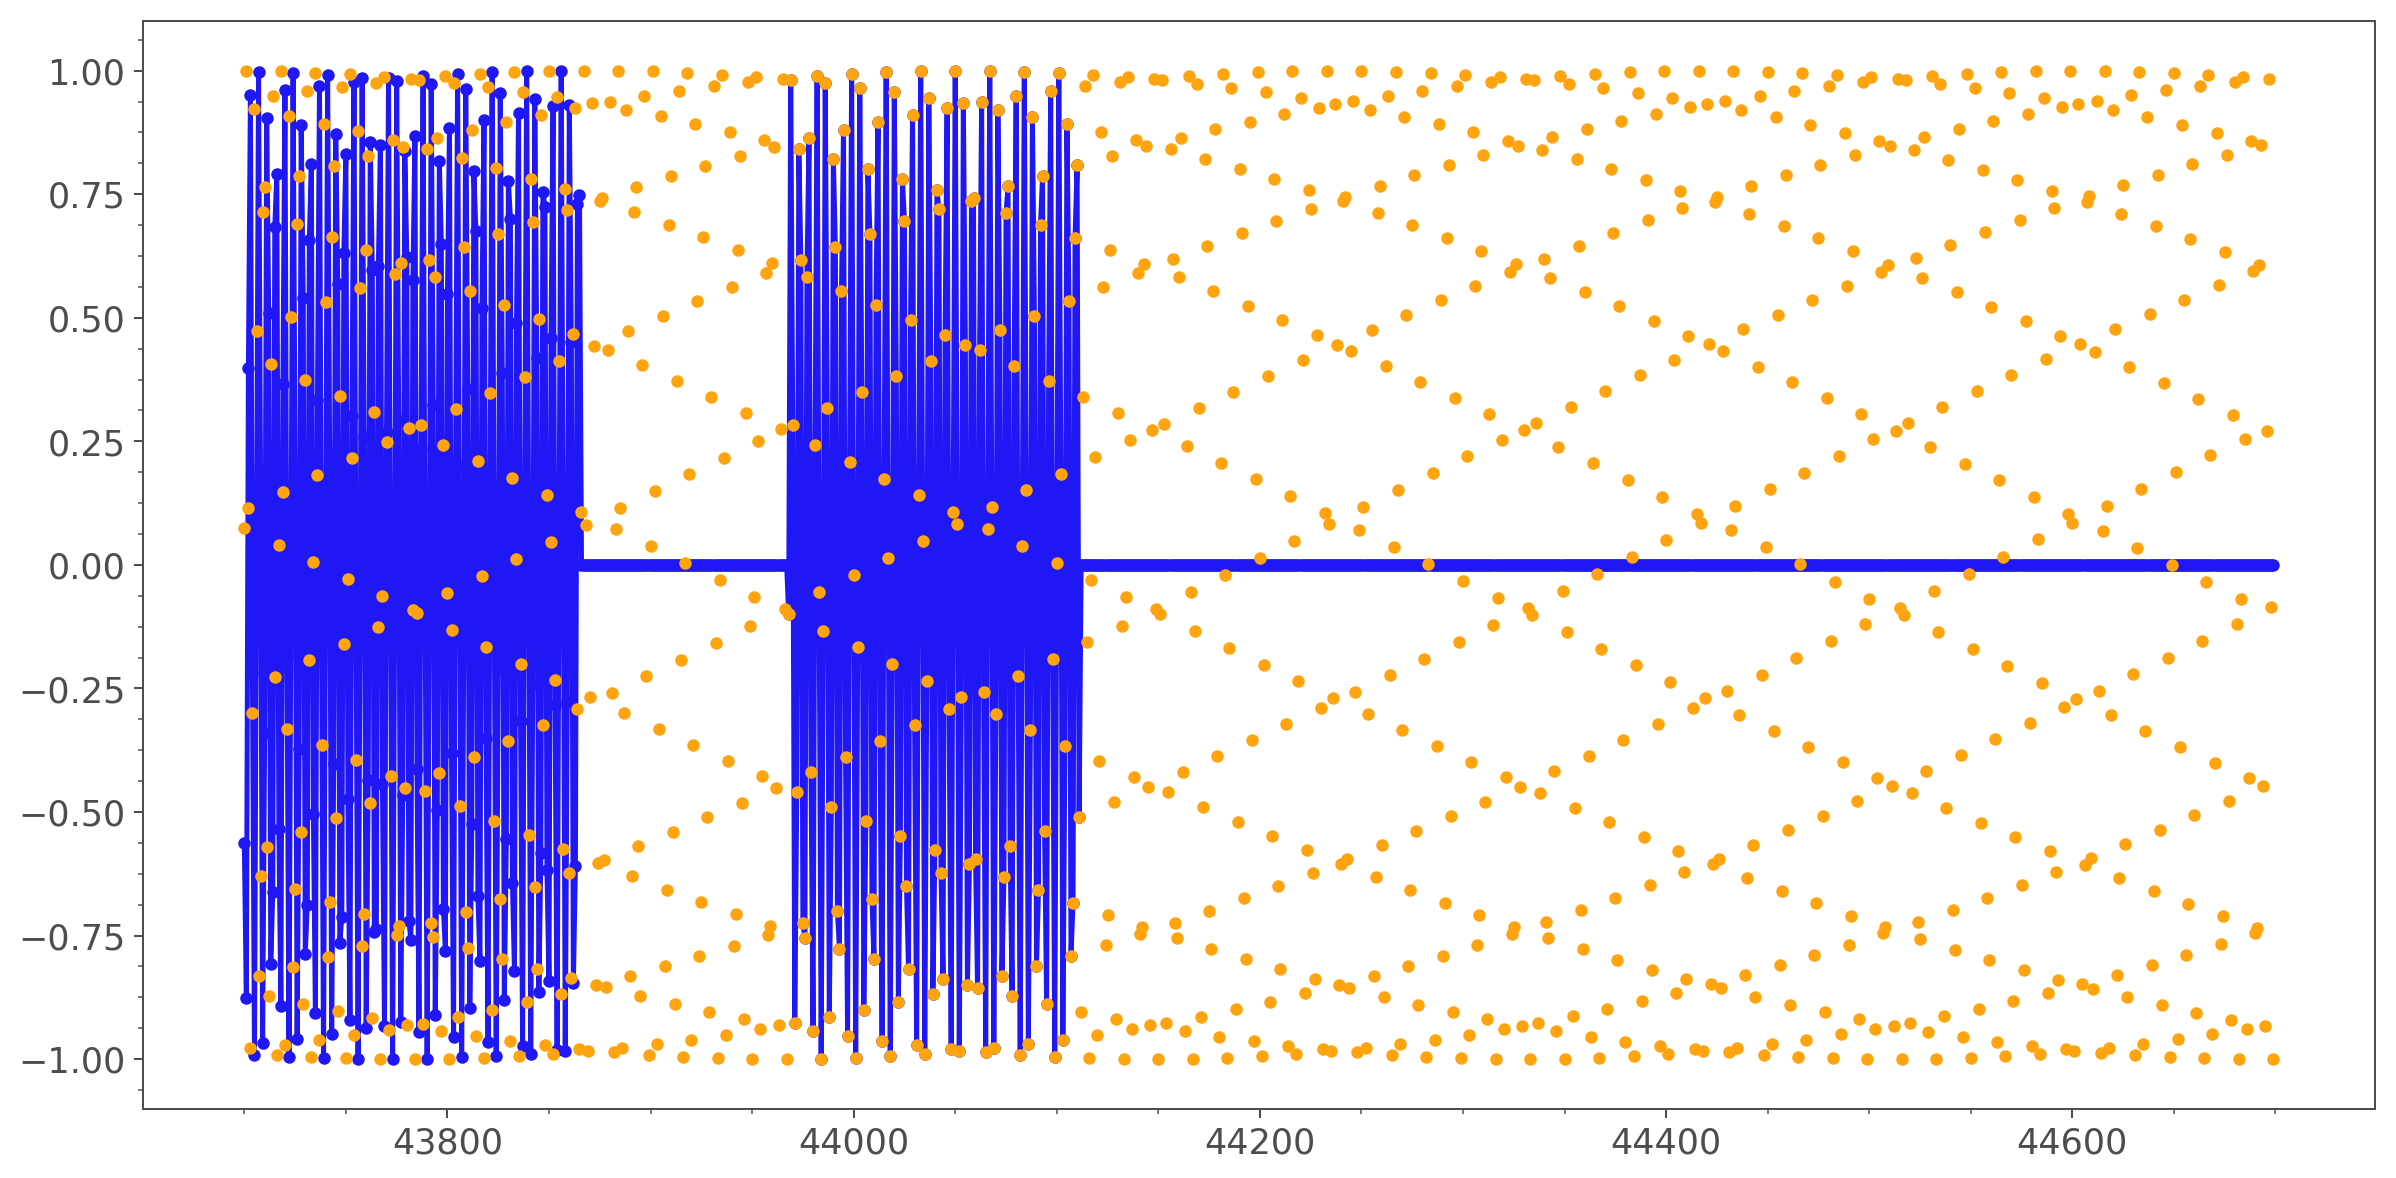

In [235]:
start =43700
stop =start+ 1000
plt.figure(figsize=(16,8))
t = np.linspace(0,(len(kdd_corr_form))/12-1, len(kdd_corr_form)/12 )
sine = wav.sine(len(t)/12, -90, 2.819660e9)
plt.plot(t[start:stop], kdd_corr_form[start:stop])
plt.plot(t[start:stop], sine[start:stop], 'o')

plt.show()

In [42]:
import gc

gc.collect()

6726

In [10]:
pml.pulse_generator_on(n_runs=2)

0

In [31]:
def start_single_pulsed_measurement(stashed_raw_data_tag='', n_runs=1):
    
        #This module was stolen from 'start_pulsed_measurement and adjusted so the sequence only runs once'
        
        pml.sigMeasurementStatusUpdated.emit(True, False)

        # Check if measurement settings need to be invoked Note: we probably don't need this as we won't invoke from settings
#         if self._invoke_settings_from_sequence:
#             if self._measurement_information:
#                 self._apply_invoked_settings()
#                 self.sigMeasurementSettingsUpdated.emit(self.measurement_settings)
#             else:
#                 # abort measurement if settings could not be invoked
#                 self.log.error('Unable to invoke measurement settings.\nThis feature can only be '
#                                'used when creating the pulse sequence via predefined methods.\n'
#                                'Aborting measurement start.')
#                 self.set_measurement_settings(invoke_settings=False)
#                 self.sigMeasurementStatusUpdated.emit(False, False)
#                 return

        with pml._threadlock:
            if pml.module_state() == 'idle':
                # Lock module state
                pml.module_state.lock()

                # Clear previous fits
                pml.do_fit('No Fit', False)
                pml.do_fit('No Fit', True)

                # initialize data arrays
                pml._initialize_data_arrays()

                # recall stashed raw data
                if stashed_raw_data_tag in pml._saved_raw_data:
                    pml._recalled_raw_data_tag = stashed_raw_data_tag
                    pml.log.info('Starting pulsed measurement with stashed raw data "{0}".'
                                  ''.format(stashed_raw_data_tag))
                else:
                    pml._recalled_raw_data_tag = None

                # start microwave source
#                 if pml.__use_ext_microwave:
                if pml._PulsedMeasurementLogic__use_ext_microwave:
                    pml.microwave_on()
                # start fast counter
                pml.fast_counter_on()
                # start pulse generator
                #self.pulse_generator_on() # we want to change this to 1 run
                pml.pulse_generator_on(n_runs=n_runs)

                # initialize analysis_timer
                pml.__elapsed_time = 0.0
                pml._elapsed_pause = 0
                pml.sigTimerUpdated.emit(pml._PulsedMeasurementLogic__elapsed_sweeps,
                                          pml._PulsedMeasurementLogic__elapsed_sweeps,
                                          pml._PulsedMeasurementLogic__timer_interval)

                # Set starting time and start timer (if present)
                pml.__start_time = time.time()
                pml.sigStartTimer.emit()

                # Set measurement paused flag
                pml.__is_paused = False
            else:
                pml.log.warning('Unable to start pulsed measurement. Measurement already running.')
        return

In [41]:
poi_list = poi_m.poi_names
for y in range(2):
    for poi in poi_list:
        poi_m.go_to_poi(poi)
        am.set_poi(poi)
        print(poi)
        am.optimize()
        for i in range(300):
            print(i)
            start_single_pulsed_measurement()
            time.sleep(2.5)
            pml.stop_pulsed_measurement()
            pml.save_measurement_data(tag=f'{poi_m.active_poi}_1uW_charge_state_{i+300*y}',
                                        save_figure=False,
                                        save_laser_pulses=True,
                                        save_pulsed_measurement=False)
            time.sleep(1.8)
pulsedmasterlogic.sample_ensemble('laser_on_2', with_load=True)
time.sleep(1)
pulsedmeasurementlogic.pulse_generator_on()
# poi_m.toggle_periodic_refocus(True)

6_1513_01
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274


0

In [23]:
poi_m.poi_names

['4_1316_01', '4_1316_02']

In [ ]:
for 
for i in range(30):
    print(i)
    start_single_pulsed_measurement()
    time.sleep(7)
    pml.stop_pulsed_measurement()
    pml.save_measurement_data(tag=f'{poi_m.active_poi}_1uW_charge_state_{i}')
    time.sleep(7)

In [102]:
green_on = 1e-3
pause = 2e-6
orange_on = 1980e-6
data_points = 1000

qudi.charge_state(green_on, pause, orange_on, data_points, counter_off = 50e-6)
time.sleep(60)
poi_m.go_to_poi('5_1610_03')
am.set_poi('5_1610_03')
am.optimize()

for i in range(20):
    print(i)
    start_single_pulsed_measurement()
    time.sleep(10)
    pml.stop_pulsed_measurement()
    pml.save_measurement_data(tag=f'{poi_m.active_poi}_1uW_1.98ms_{i}')
    time.sleep(10)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [40]:
for i in range(1):
    start_single_pulsed_measurement()
    time.sleep(4)
    pml.stop_pulsed_measurement()

In [42]:
green_on = 1e-3
pause = 2e-6
orange_on = 10000e-6
data_points = 1
qudi.charge_state(green_on, pause, orange_on, data_points, counter_off = 1000e-6)

In [154]:
am.auto_run(True, True, 300, 20*300, 20*300, '8_testNV1_1uW', fit=None, alternating = False, sleep_aft_opt_time=20)

In [ ]:
pulsedmeasurementlogic.pulse_generator_off()
pulsedmasterlogic.sample_ensemble('charge_statw_qudi', with_load=True)
time.sleep(1)
poi_list = poi_m.poi_names
for poi in poi_list:
    poi_m.go_to_poi(poi)
    am.set_poi(poi)
    print(poi)
    am.optimize()
    am.auto_run(True, True, 2*300, 15*300, 15*300, f'{poi}_1uW', fit=None, alternating = False, sleep_aft_opt_time=20, raw_data_threshold=10e3)
pulsedmasterlogic.sample_ensemble('laser_on_2', with_load=True)
time.sleep(1)
pulsedmeasurementlogic.pulse_generator_on()
# poi_m.toggle_periodic_refocus(True)

6_1513_01


In [23]:
pulsedmasterlogic.sample_ensemble('laser_on_2', with_load=True)
time.sleep(1)
pulsedmeasurementlogic.pulse_generator_on()

0

In [183]:
pulsedmeasurementlogic.pulse_generator_off()
pulsedmasterlogic.sample_ensemble('charge_readout', with_load=True)

In [34]:
pulsedmeasurementlogic.pulse_generator_off()
pulsedmasterlogic.sample_ensemble('charge_statw_qudi', with_load=True)

In [61]:
am.auto_run(True, True, 2*300, 6*300, 6*300, f'{poi_m.active_poi}_1uW', fit=None, alternating = False, sleep_aft_opt_time=20, raw_data_threshold=5e3)

In [246]:
pulsedmeasurementlogic.pulse_generator_off()
pulsedmasterlogic.sample_ensemble('orange_pulse', with_load=True)
data_val = pulsedmeasurementlogic.signal_data[1][0]
am.optimize()
start_single_pulsed_measurement(n_runs=200)
while pulsedmeasurementlogic.module_state() == 'locked':        
    data_val = pulsedmeasurementlogic.signal_data[1][0]
    time.sleep(2)
    if pulsedmeasurementlogic.signal_data[1] == data_val:
        break
    time.sleep(1)
pml.stop_pulsed_measurement()
pml.save_measurement_data(tag=f'9_testNV_500uW_steady_state')
pulsedmasterlogic.sample_ensemble('laser_on_2', with_load=True)
time.sleep(1)
pulsedmeasurementlogic.pulse_generator_on()

0

In [32]:
pulsedmasterlogic.sample_ensemble('laser_on_2', with_load=True)
pulsedmeasurementlogic.pulse_generator_on()

0

In [191]:
pulsedmeasurementlogic.pulse_generator_off()

0

In [4]:
pulsedmasterlogic.sample_ensemble('orange_pulse', with_load=True)

In [129]:
poi_m.poi_names[1:2]

['5_1710_01']